# 1. Perkenalan 

**Nama : Dimas Furqon P.** 
**Kelas : Data Science Delta Indie Course**

**Nama Project : Final Project 2.**



# 2. Latar Belakang

## 2.a Data Overview

Mental Health Diagnosis and Treatment Monitoring Dataset adalah data yang berisi dari 500 baris yang mewakili kesehatan mental berdasarkan hasil diagnosis kesehatan mental dari kejadian nyata, rencana perawatan, dan hasil. Termasuk didalamnya demografi pasien, keparahan gejala, pengobatan, tipe terapi dan jejak peningkatan. **Dataset ini bersifat sintetis dan dibuat untuk penelitian dan tujuan analitis**


Beberapa variabel yang terdapat dalam dataset ini dan dapat dianalisis antara lain: 

1. **Patient ID**: Identitas unik pasien
2. **Age**: Usia Pasien
3. **Gender**: Laki-laki atau perempuan
4. **Diagnosis**: Kondisi Mental Health (e.g., Anxiety, Depression).
5. **Symptom Severity (1-10)**: Keparahan gejala (skala 1-10).
6. **Mood Score (1-10)**: Kondisi mood pada saat perawatan (skala 1-10).
7. **Sleep Quality (1-10)**: Kualitas tidur pasien yang dilaporkan(skala 1-10).
8. **Physical Activity**: Aktifitas(jam) dalam 1 pekan.
9. **Medication**: Pengobatan/obat yang diberikan(e.g., SSRIs, Antidepressants).
10. **Therapy Type**: Jenis terapi (e.g., CBT, DBT).
11. **Treatment Start Date**: Tanggal mulai perawatan.
12. **Treatment Duration**: Durasi perawatan dalam sepekan.
13. **Stress Level (1-10)**: Level Stres pasien.
14. **Outcome**: Hasil perawatan (e.g., Improved, Deteriorated).
15. **Treatment Progress (1-10)**: Perkembangan selama perawatan.
16. **AI-Detected Emotional State**: Kondisi emosional berdasarkan deteksi AI (e.g., Happy, Anxious).
17. **Adherence to Treatment (%)**: Persentase kepatuhan terhadap perawatan.

Kasus yang dapat digunakan

- **Klasifikasi Diagnosis**: Mengklasifikasikan pasien berdasarkan kondisi mental health mereka.
- **Prediksi Hasil**: Memprediksi "Outcomes" berdasarkan data pasien.
- **Monitoring tingkat kepatuhan**: Melakukan analisis kepatuhan pasien dan efeknya terhadap "Outcomes".
- **Deteksi Kondisi Emosional**: Menggunakan AI untuk mendeteksi jejak kondisi emosional.
- **Kemanjuran perawatan**: Evaluate the impact of different therapies on progress.
- 
Ethical Considerations
Ensure that patient data is anonymized, and models are tested for fairness and bias in their predictions. This dataset is synthetic and does not represent real patient information.

## 2.b Data Objective

Final Project 2 ini dibuat guna mengevaluasi konsep Machine Learning bertipe Klasifikasi dengan :

● Mampu memahami konsep Regression dan mampu persiapkan data untuk digunakan dengan Ensemble Model

● Mampu melakukan seleksi model terbaik

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# 3. Import Pustaka (Library)

In [70]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [125]:
pip install pandas-dq

Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/150.0 MB 9.4 MB/s eta 0:00:16
    --------------------------------------- 3.1/150.0 MB 8.4 MB/s eta 0:00:18
   - -------------------------------------- 5.0/150.0 MB 8.4 MB/s eta 0:00:18
   - -------------------------------------- 6.8/150.0 MB 8.4 MB/s eta 0:00:18
   -- ------------------------------------- 8.9/150.0 MB 8.7 MB/s eta 0:00:17
   -- ------------------------------------- 11.0/150.0 MB 8.9 MB/s eta 0:00:16
   --- ------------------------------------ 13.4/150.0 MB 9.2 MB/s eta 0:00:15
   ---- ----------------------------------- 15.7/150.0 MB 9.4 MB/s eta 0:00:15
   ---- ----------------------------------- 18.4/150.0 MB 9.7 MB/s eta 0:00:14
   ----- ---------------------------------- 20.7/150.0 MB 9.9 MB/s eta 0:00:14
   ------ --------------------------------- 22.5/150.0 MB 9.8 MB/s eta 0:00:13
   ------ --------------------------------- 24.6/150.0 MB 9.8 MB/

In [119]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from pandas_dq import dq_report,Fix_DQ

ModuleNotFoundError: No module named 'pandas_dq'

# 4. Data Loading

## 4.1 Memanggil Dataset

In [127]:
df = pd.read_csv("mental_health_diagnosis_treatment_.csv")
df.head(10)

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
5,6,28,Male,Panic Disorder,8,7,6,4,SSRIs,Cognitive Behavioral Therapy,2024-01-11,13,9,No Change,7,Stressed,82
6,7,59,Male,Generalized Anxiety,6,6,5,3,Mood Stabilizers,Dialectical Behavioral Therapy,2024-02-21,13,8,Deteriorated,5,Anxious,79
7,8,32,Female,Major Depressive Disorder,5,3,5,2,Antidepressants,Cognitive Behavioral Therapy,2024-02-03,12,5,No Change,6,Stressed,74
8,9,21,Female,Major Depressive Disorder,6,7,7,10,Antidepressants,Mindfulness-Based Therapy,2024-01-16,15,5,No Change,6,Neutral,67
9,10,21,Female,Panic Disorder,9,5,9,7,Antidepressants,Cognitive Behavioral Therapy,2024-01-03,11,8,No Change,8,Depressed,89


## 4.2 Melihat ukuran/dimensi data (baris,kolom)

In [130]:
df.shape

(500, 17)

## 4.3 Pengecekan nama kolom 

In [133]:
da = df.columns.values
da
dc = pd.DataFrame({'Nama kolom':da})
dc

,Nama kolom
0,Patient ID
1,Age
2,Gender
3,Diagnosis
4,Symptom Severity (1-10)
5,Mood Score (1-10)
6,Sleep Quality (1-10)
7,Physical Activity (hrs/week)
8,Medication
9,Therapy Type


## 4.4 Penjelasan per kolom

In [136]:
import pandas as pd

# Define the data
data = {
    "Key Features": [
        "Patient ID",
        "Age",
        "Gender",
        "Diagnosis",
        "Symptom Severity (1-10)",
        "Mood Score (1-10)",
        "Sleep Quality (1-10)",
        "Physical Activity",
        "Medication",
        "Therapy Type",
        "Treatment Start Date",
        "Treatment Duration",
        "Stress Level (1-10)",
        "Outcome",
        "Treatment Progress (1-10)",
        "AI-Detected Emotional State",
        "Adherence to Treatment (%)"
    ],
    "Explanation": [
        "Identitas unik pasien",
        "Usia Pasien",
        "Laki-laki atau perempuan",
        "Kondisi Mental Health (e.g., Anxiety, Depression)",
        "Keparahan gejala (skala 1-10)",
        "Kondisi mood pada saat perawatan (skala 1-10)",
        "Kualitas tidur pasien yang dilaporkan (skala 1-10)",
        "Aktifitas (jam) dalam 1 pekan",
        "Pengobatan/obat yang diberikan (e.g., SSRIs, Antidepressants)",
        "Jenis terapi (e.g., CBT, DBT)",
        "Tanggal mulai perawatan",
        "Durasi perawatan dalam sepekan",
        "Level Stres pasien",
        "Hasil perawatan (e.g., Improved, Deteriorated)",
        "Perkembangan selama perawatan (skala 1-10)",
        "Kondisi emosional berdasarkan deteksi AI (e.g., Happy, Anxious)",
        "Persentase kepatuhan terhadap perawatan"
    ]
}

# Create the DataFrame with an index column
penjelasan = pd.DataFrame(data)
penjelasan.index += 1  # Add an index starting from 1

# Display the DataFrame
penjelasan



,Key Features,Explanation
1,Patient ID,Identitas unik pasien
2,Age,Usia Pasien
3,Gender,Laki-laki atau perempuan
4,Diagnosis,"Kondisi Mental Health (e.g., Anxiety, Depression)"
5,Symptom Severity (1-10),Keparahan gejala (skala 1-10)
6,Mood Score (1-10),Kondisi mood pada saat perawatan (skala 1-10)
7,Sleep Quality (1-10),Kualitas tidur pasien yang dilaporkan (skala 1...
8,Physical Activity,Aktifitas (jam) dalam 1 pekan
9,Medication,"Pengobatan/obat yang diberikan (e.g., SSRIs, A..."
10,Therapy Type,"Jenis terapi (e.g., CBT, DBT)"


## 4.5 Tipe Data

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

## 4.6 Deskriptif Statistik

In [140]:
df.describe()

,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,12.110000,7.542000,7.436000,75.45400
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,2.440864,1.709409,1.725067,9.08697
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,16.000000,10.000000,10.000000,90.00000


## 4.7 Pengecekan Missing Value 

In [145]:
df.isna().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [147]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

karena data yang diperoleh dari awal sudah tidak memiliki "missing values" maka kita bisa melewatkan step untuk pembersihan missing value.

## 4.8 Pengecekan data duplikat

In [151]:
df.duplicated().sum()

0

In [153]:
df[df.duplicated()].head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)


setelah kita melakukan peninjauan terhadap dataset, terlihat bahwa data yang kita memiliki sudah berstatus "clean" karena tidak memiliki "missing values" dan "duplicate data"

## 4.9 Penggantian nama kolom

Karena nama kolom pada dataframe masih dirasa terlalu panjang maka perlu dilakukan simplifikasi nama pada kolom yang terlalu panjang.

In [158]:
df.columns.values

array(['Patient ID', 'Age', 'Gender', 'Diagnosis',
       'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Medication', 'Therapy Type', 'Treatment Start Date',
       'Treatment Duration (weeks)', 'Stress Level (1-10)', 'Outcome',
       'Treatment Progress (1-10)', 'AI-Detected Emotional State',
       'Adherence to Treatment (%)'], dtype=object)

In [160]:
df.rename(columns={'Symptom Severity (1-10)':'symptom',
                   'Mood Score (1-10)':'mood',
                   'Sleep Quality (1-10)':'sleep',
                   'Physical Activity (hrs/week)':'physical',
                   'Therapy Type':'Therapy',
                   'Treatment Start Date':'treatment',
                   'Treatment Duration (weeks)':'duration',
                   'Stress Level (1-10)':'stress',
                   'Treatment Progress (1-10)':'progres',
                   'AI-Detected Emotional State':'AIstate',
                   'Adherence to Treatment (%)':'Target'                   
                  },inplace = True )

In [162]:
df.tail()

,Patient ID,Age,Gender,Diagnosis,symptom,mood,sleep,physical,Medication,Therapy,treatment,duration,stress,Outcome,progres,AIstate,Target
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73
499,500,58,Male,Bipolar Disorder,5,7,6,2,SSRIs,Cognitive Behavioral Therapy,2024-03-24,10,6,Deteriorated,5,Happy,70


In [163]:
## mengubah format date time pada kolom treatment

df["treatment"] = pd.to_datetime(df["treatment"], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Patient ID  500 non-null    int64         
 1   Age         500 non-null    int64         
 2   Gender      500 non-null    object        
 3   Diagnosis   500 non-null    object        
 4   symptom     500 non-null    int64         
 5   mood        500 non-null    int64         
 6   sleep       500 non-null    int64         
 7   physical    500 non-null    int64         
 8   Medication  500 non-null    object        
 9   Therapy     500 non-null    object        
 10  treatment   500 non-null    datetime64[ns]
 11  duration    500 non-null    int64         
 12  stress      500 non-null    int64         
 13  Outcome     500 non-null    object        
 14  progres     500 non-null    int64         
 15  AIstate     500 non-null    object        
 16  Target      500 non-null  

# 5. Eksplorasi Data Analisis

## 5.1 Statistik Deskriptif

In [168]:
dfc= df.copy()
dfc.describe()

,Patient ID,Age,symptom,mood,sleep,physical,treatment,duration,stress,progres,Target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500.000000,500.000000,500.000000,500.00000
mean,250.500000,38.708000,7.478000,5.482000,6.472000,5.216000,2024-02-18 09:53:16.800000,12.110000,7.542000,7.436000,75.45400
min,1.000000,18.000000,5.000000,3.000000,4.000000,1.000000,2024-01-01 00:00:00,8.000000,5.000000,5.000000,60.00000
25%,125.750000,28.000000,6.000000,4.000000,5.000000,3.000000,2024-01-23 18:00:00,10.000000,6.000000,6.000000,67.00000
50%,250.500000,38.000000,8.000000,5.000000,6.000000,5.000000,2024-02-17 00:00:00,12.000000,8.000000,7.000000,76.00000
75%,375.250000,50.000000,9.000000,7.000000,8.000000,8.000000,2024-03-17 00:00:00,14.000000,9.000000,9.000000,84.00000
max,500.000000,60.000000,10.000000,8.000000,9.000000,10.000000,2024-04-10 00:00:00,16.000000,10.000000,10.000000,90.00000
std,144.481833,12.712433,1.706265,1.707486,1.668167,2.829374,NaN,2.440864,1.709409,1.725067,9.08697


In [170]:
# membuat dataset yang berisi kolom numerik 
df_nm = dfc.describe().columns.values

# membuat dataset yang berisi data kategorik (non numerik)
df_kat = dfc.drop(np.array(df_nm), axis=1)

df_n = dfc.drop(np.array(df_kat.columns.values), axis=1) 
df_num = df_n.drop(['Patient ID','treatment'], axis=1)
df_num
df_kat.tail()

,Gender,Diagnosis,Medication,Therapy,Outcome,AIstate
495,Male,Generalized Anxiety,Mood Stabilizers,Dialectical Behavioral Therapy,Improved,Depressed
496,Male,Panic Disorder,Benzodiazepines,Mindfulness-Based Therapy,Deteriorated,Happy
497,Male,Major Depressive Disorder,Antidepressants,Cognitive Behavioral Therapy,Deteriorated,Neutral
498,Male,Bipolar Disorder,Antidepressants,Mindfulness-Based Therapy,Improved,Anxious
499,Male,Bipolar Disorder,SSRIs,Cognitive Behavioral Therapy,Deteriorated,Happy


In [172]:
pd.DataFrame(df_kat["Gender"].value_counts())

,count
Gender,
Male,266
Female,234


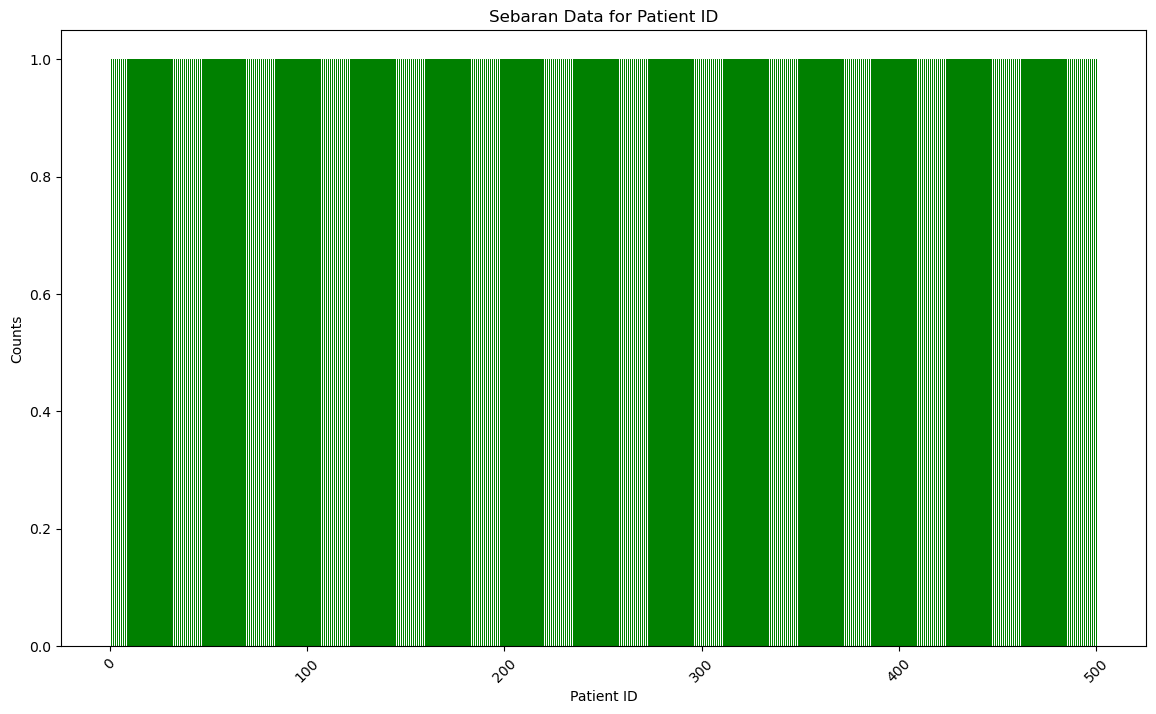

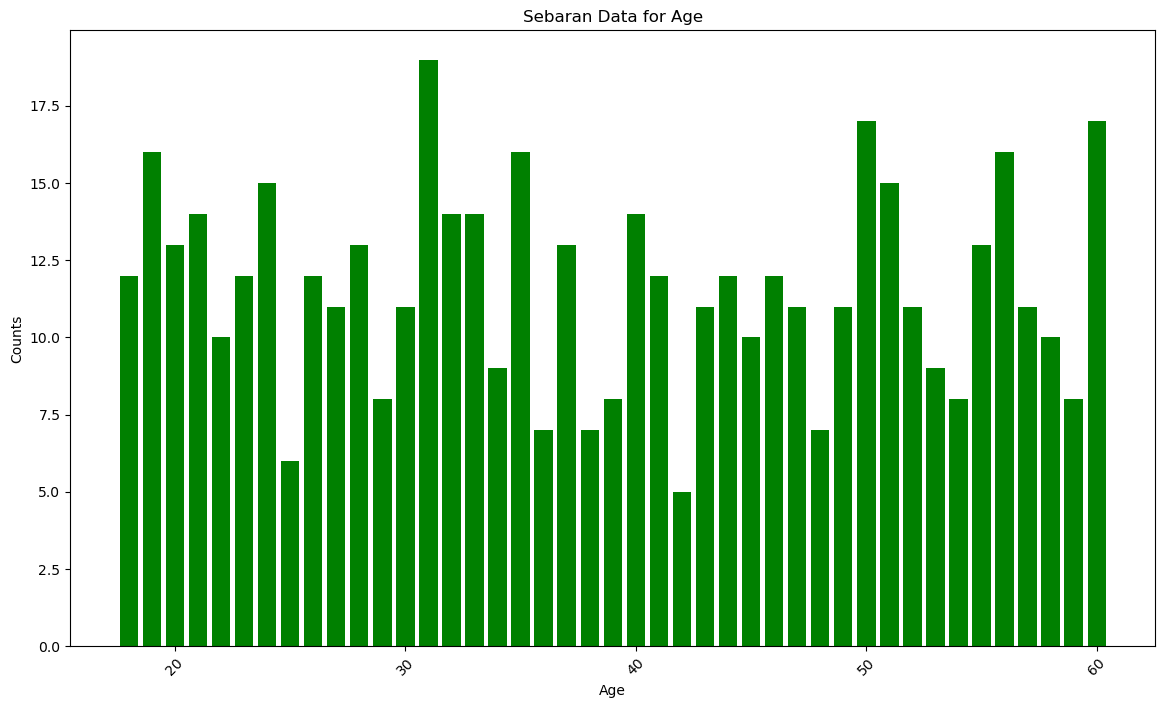

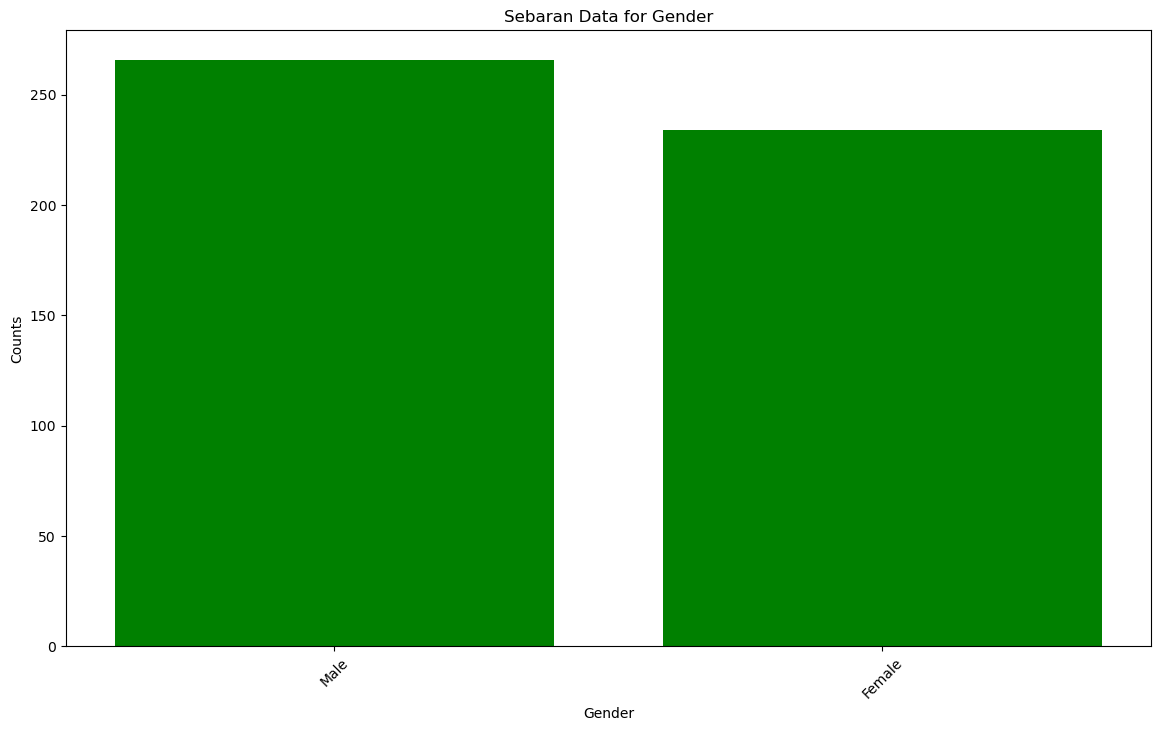

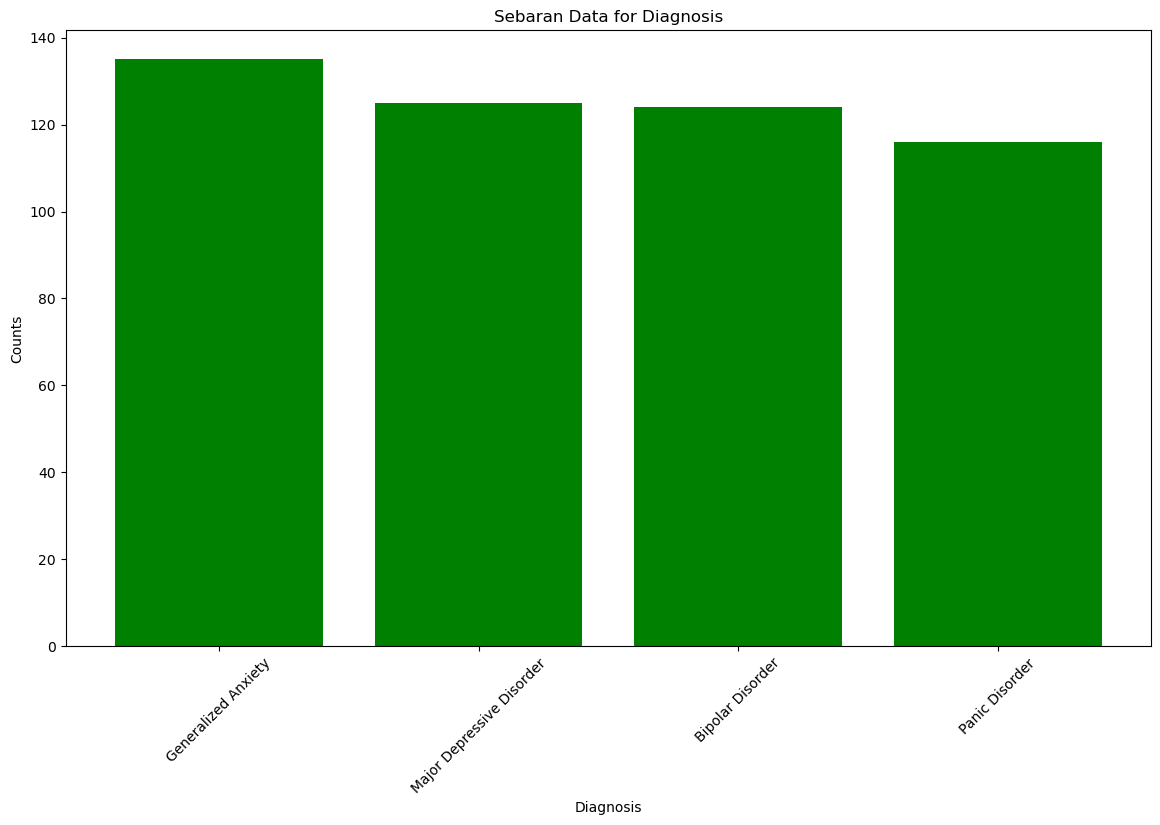

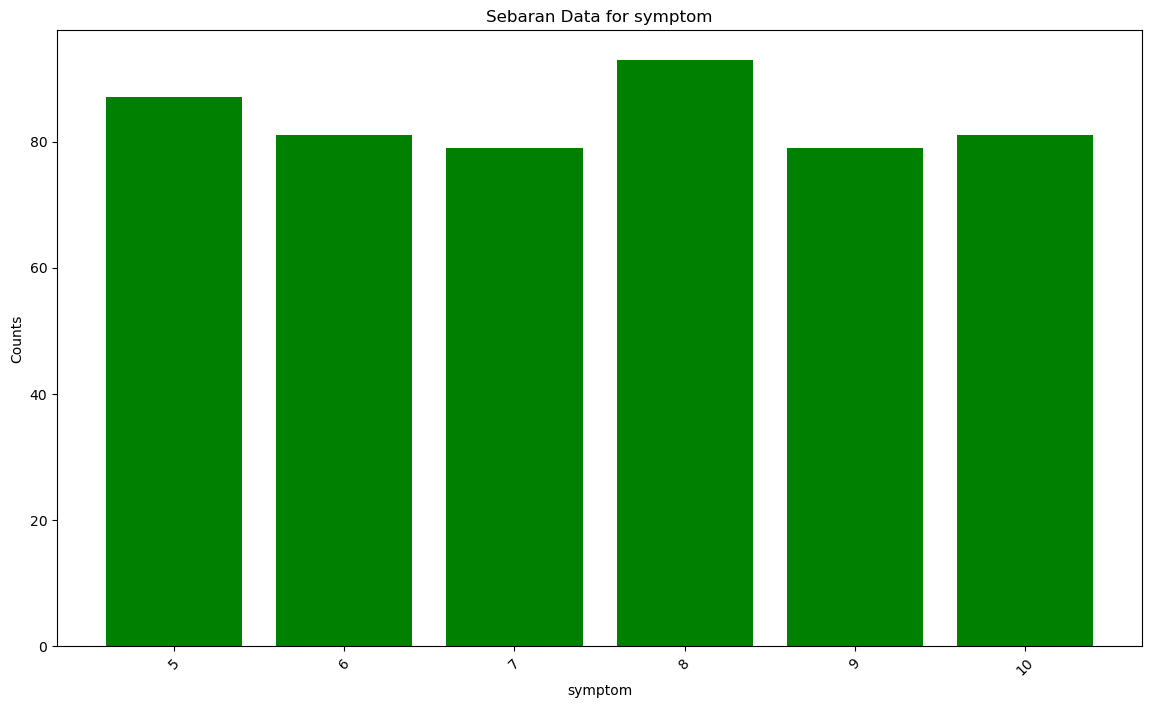

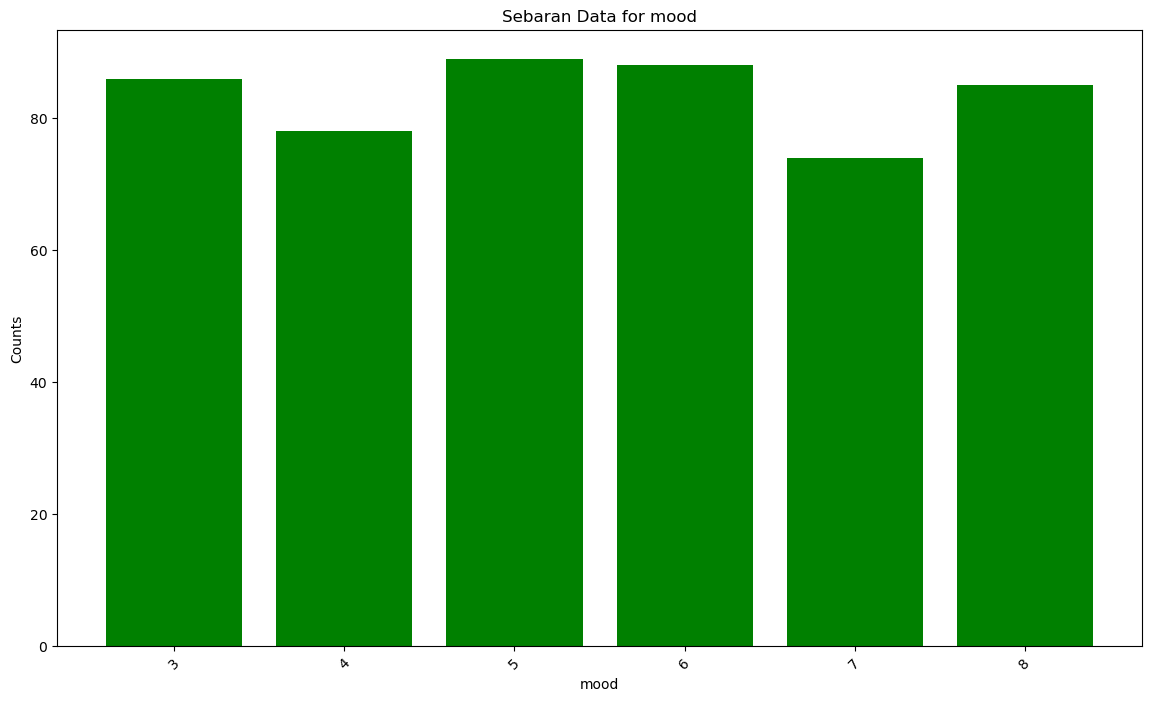

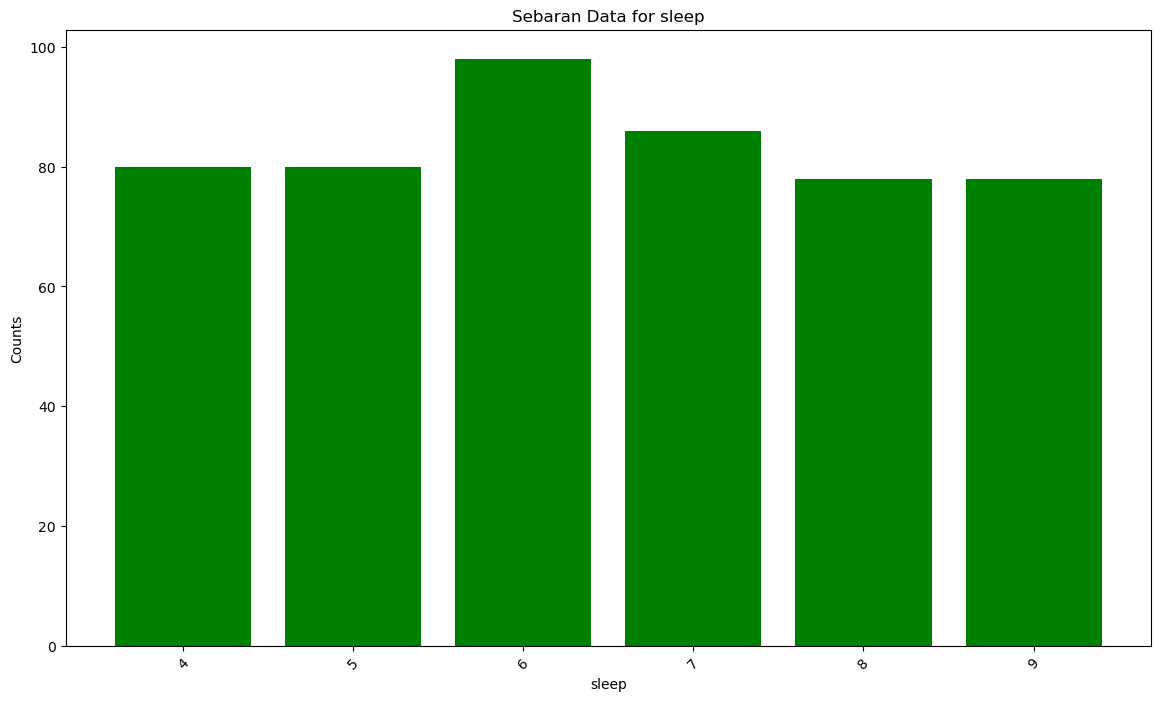

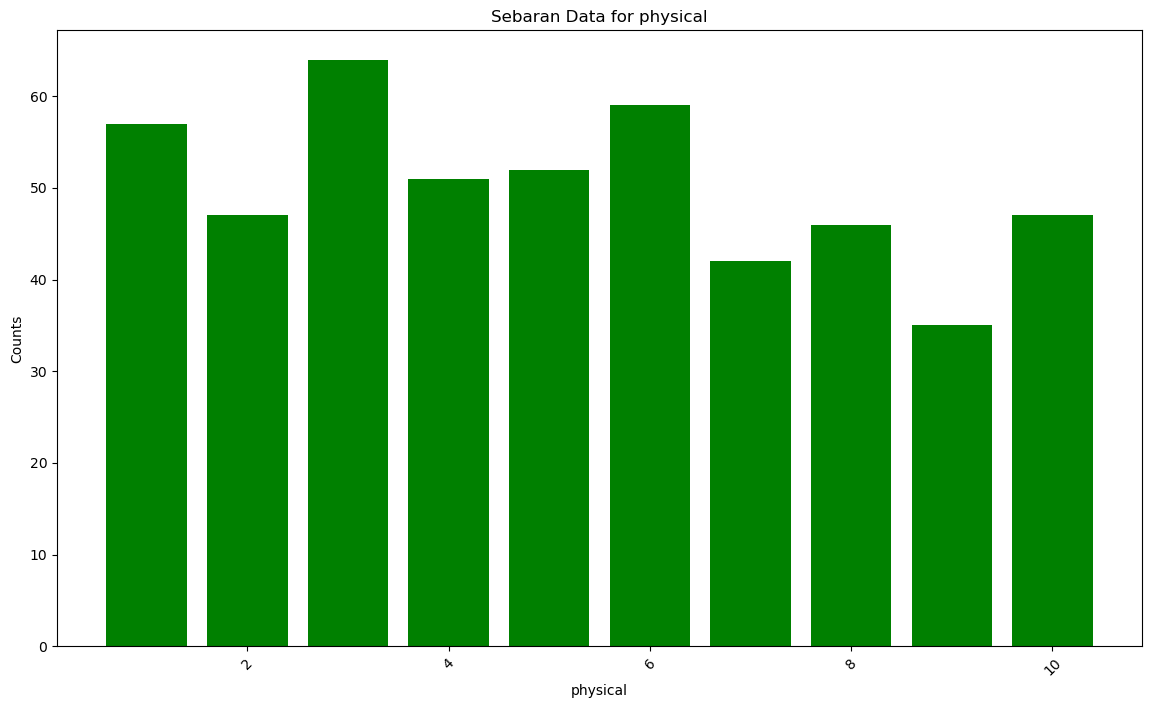

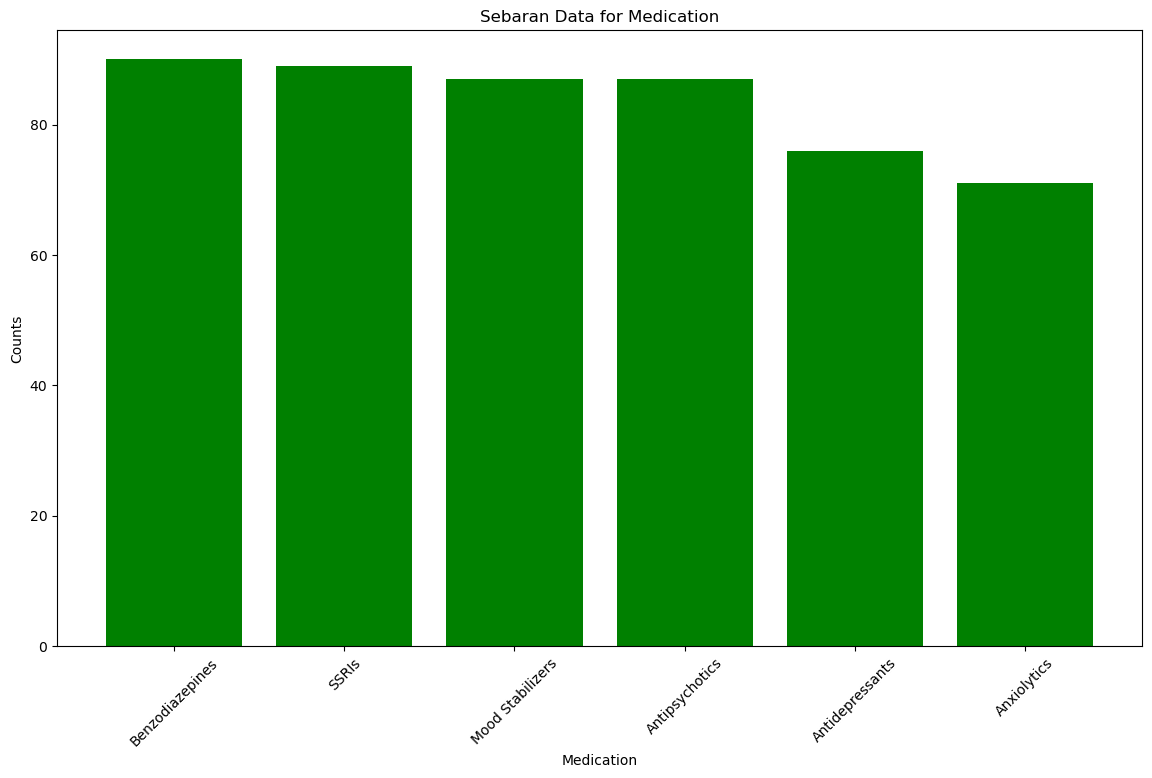

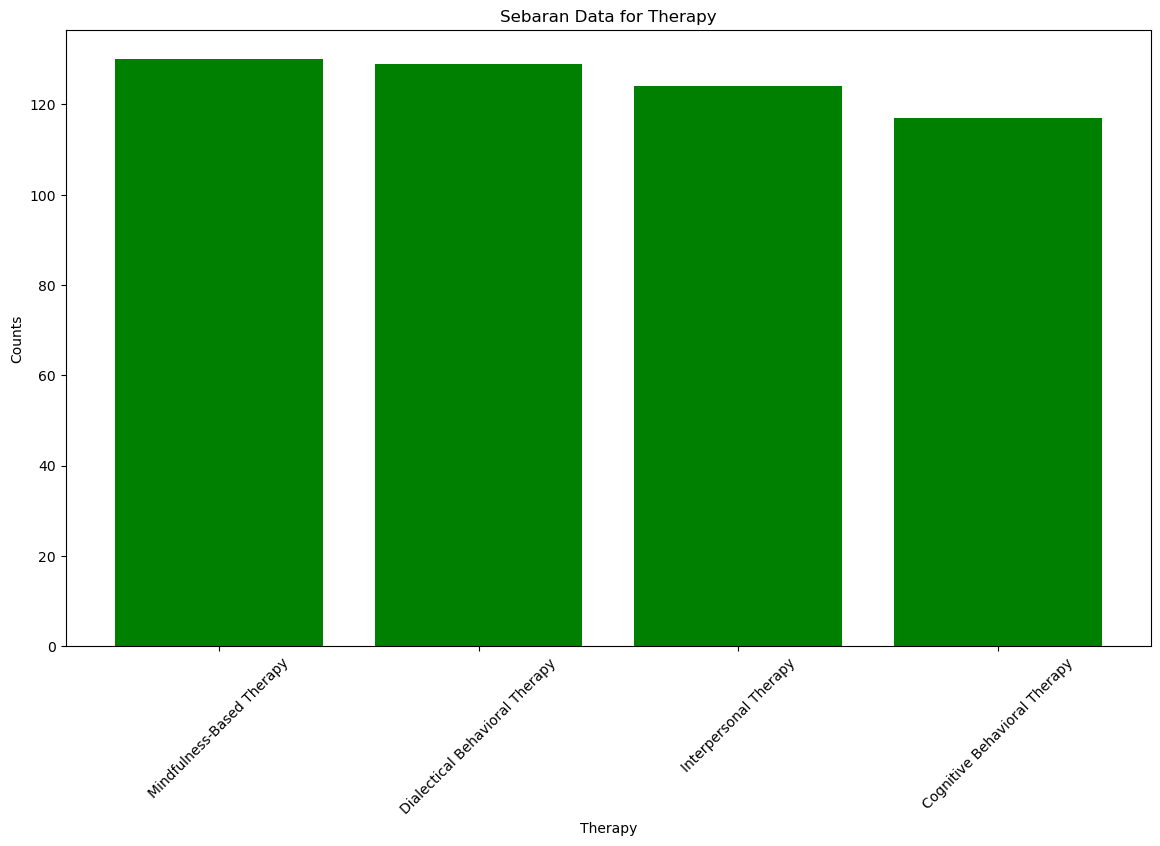

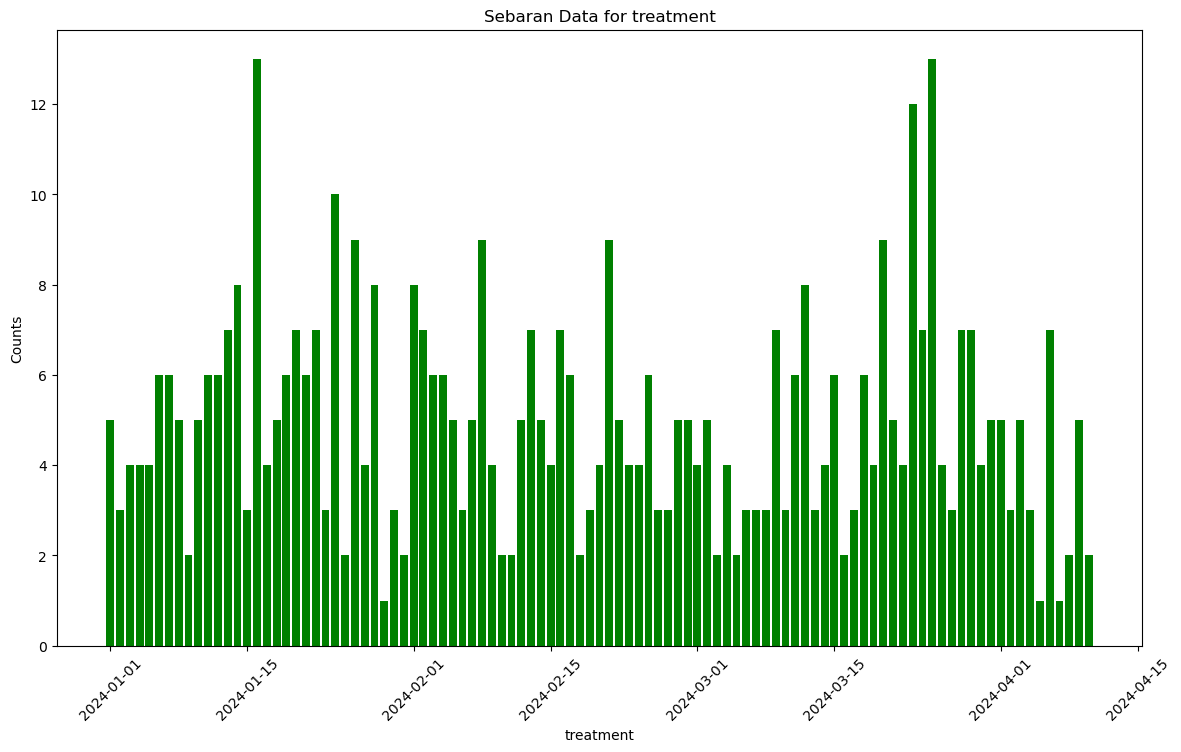

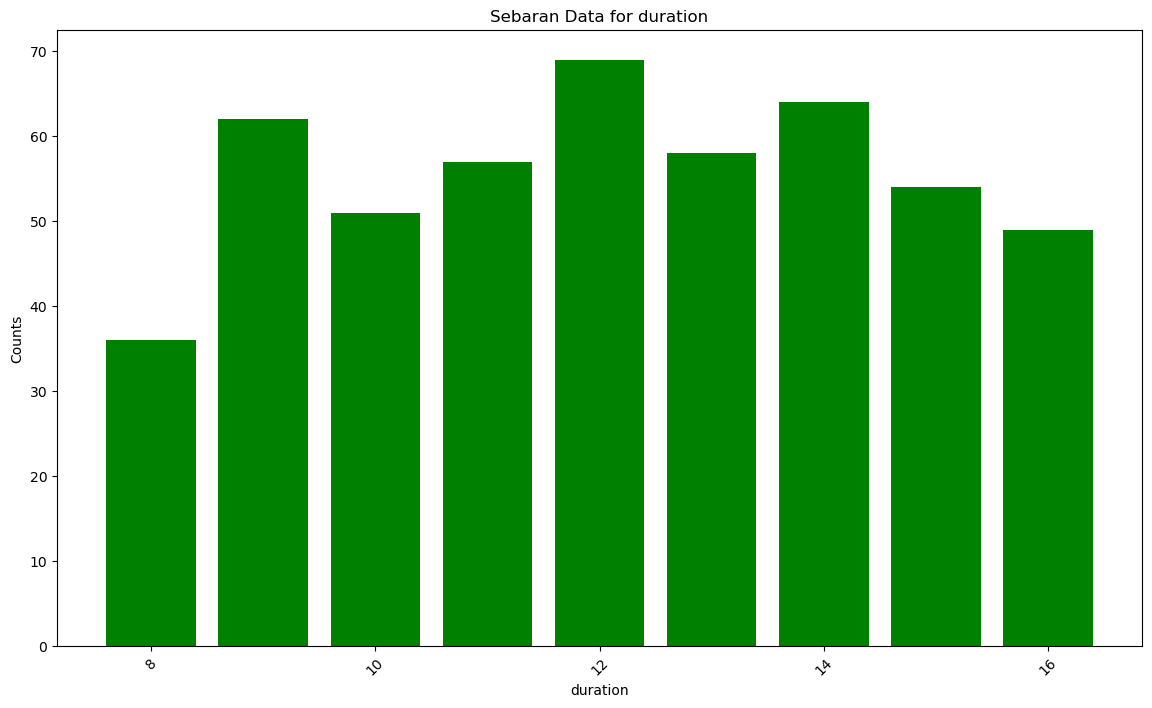

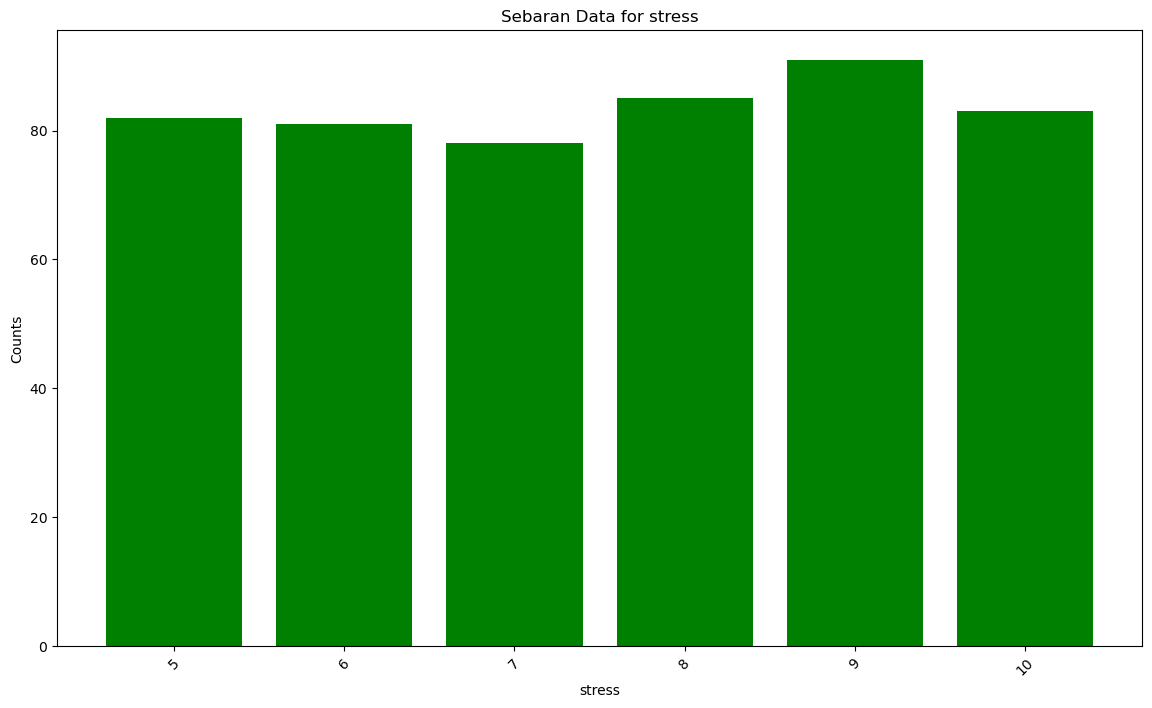

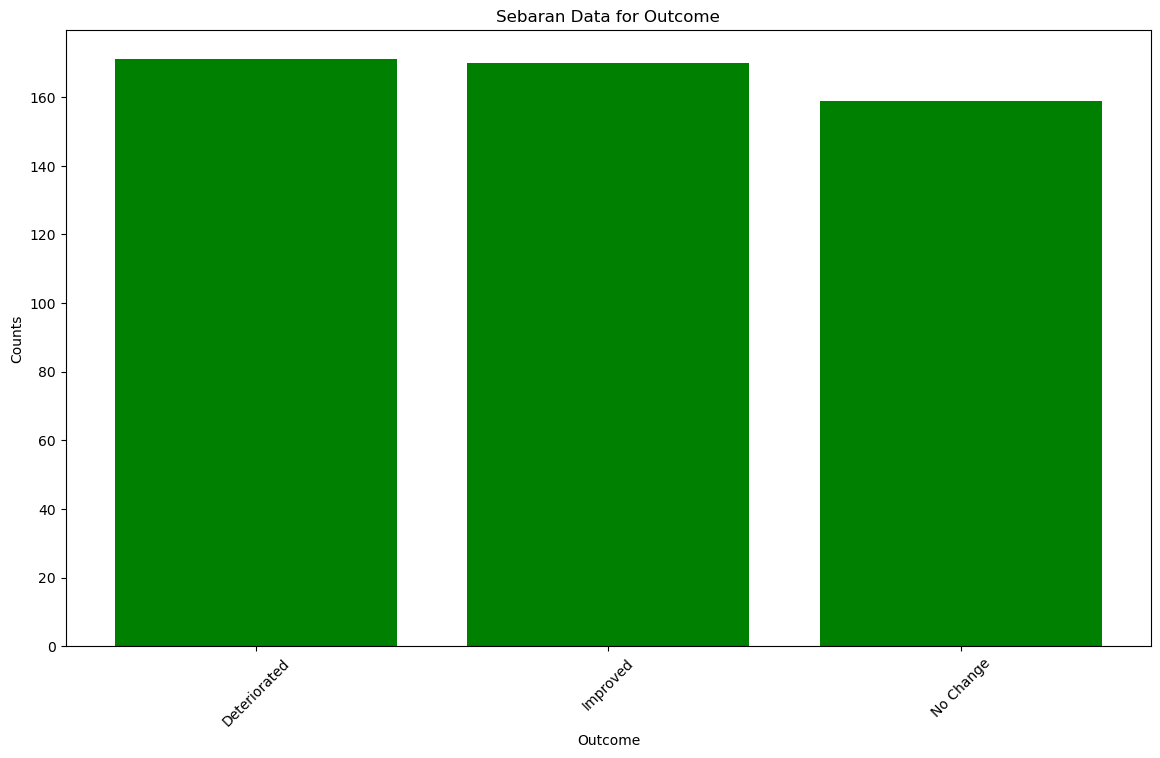

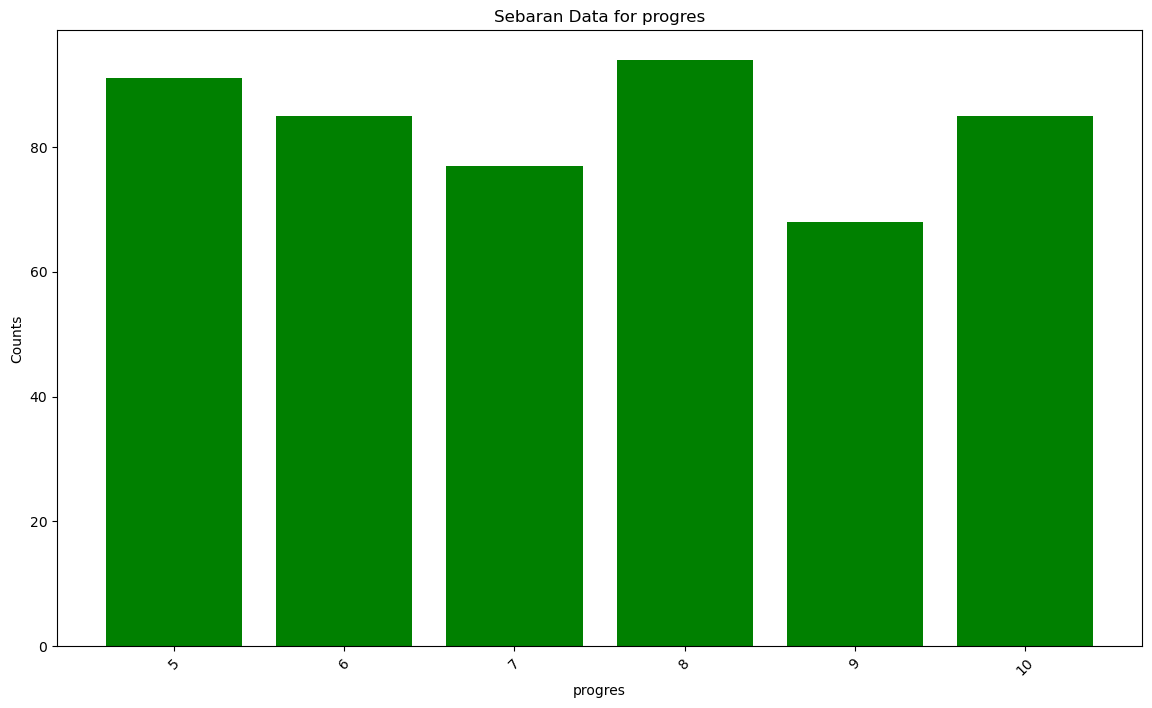

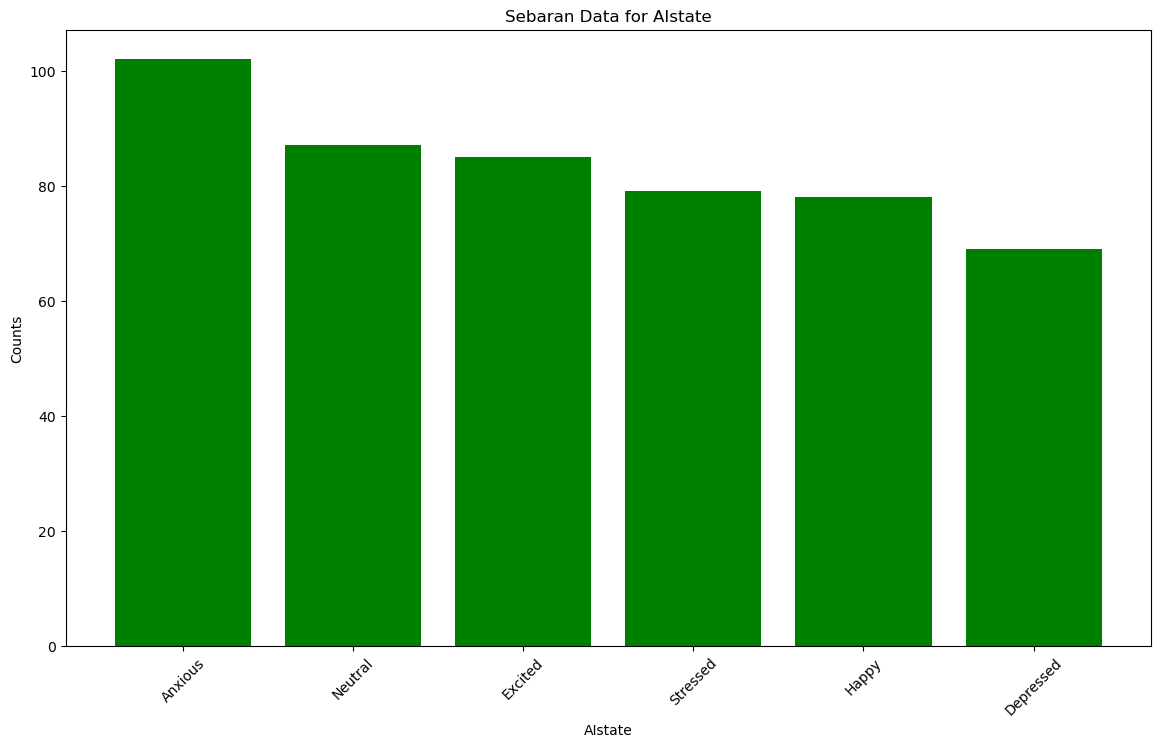

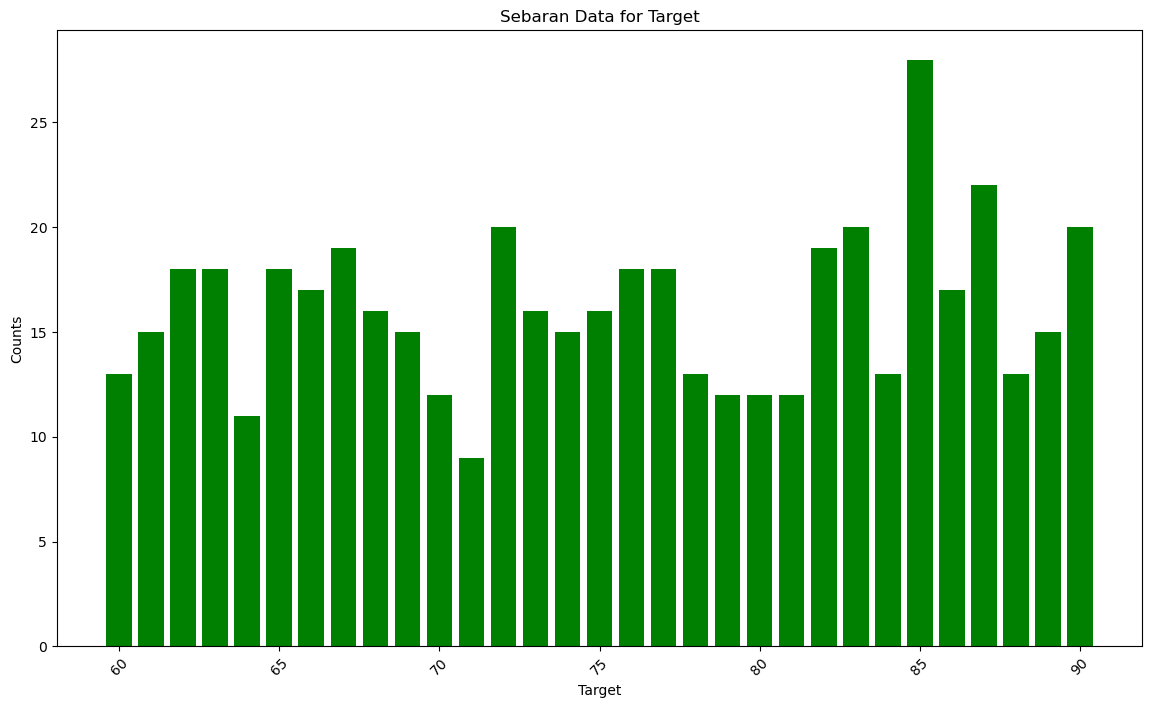

In [174]:
# Melihat grafik sebaran data
for col in df.columns:
    plt.figure(figsize=(14, 8))
    # Use the actual column data for value_counts
    counts = df[col].value_counts()
    plt.bar(counts.index,counts.values,color='Green')  # Removed the 'hue' argument
    plt.title(f"Sebaran Data for {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_21792\3566604275.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


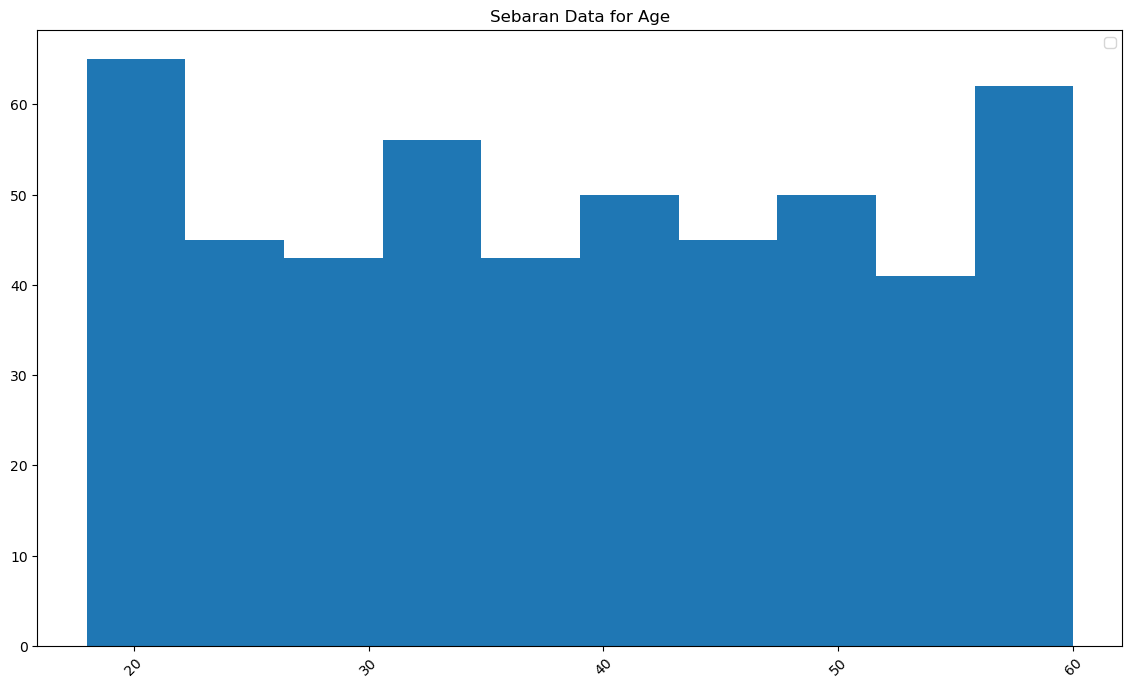

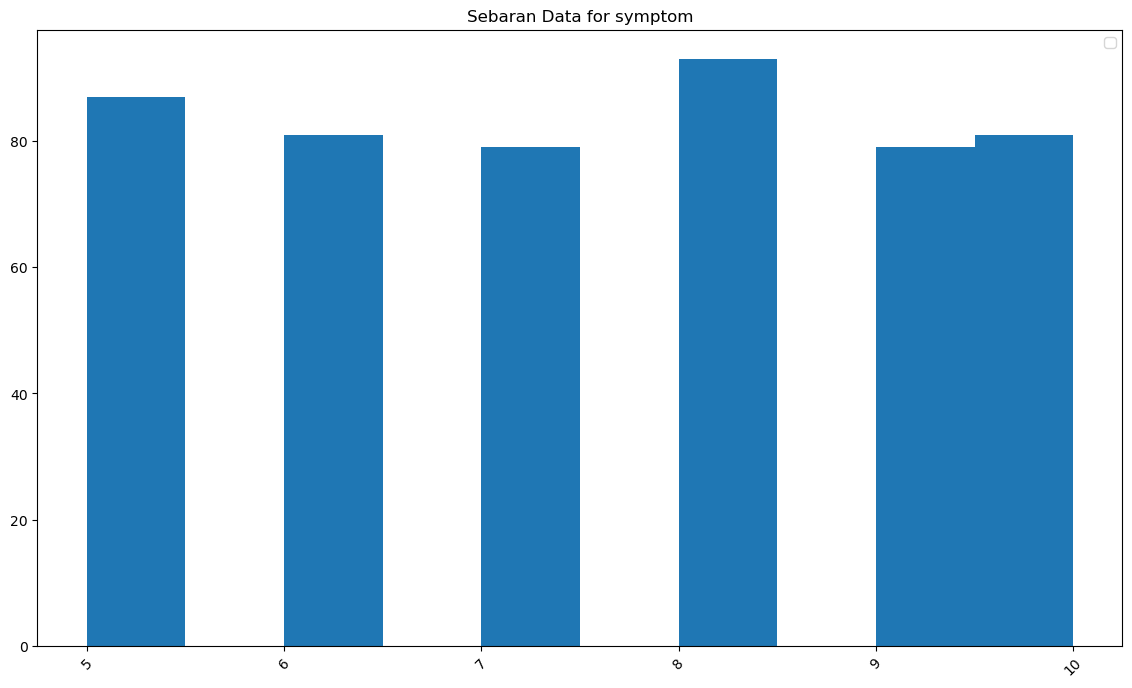

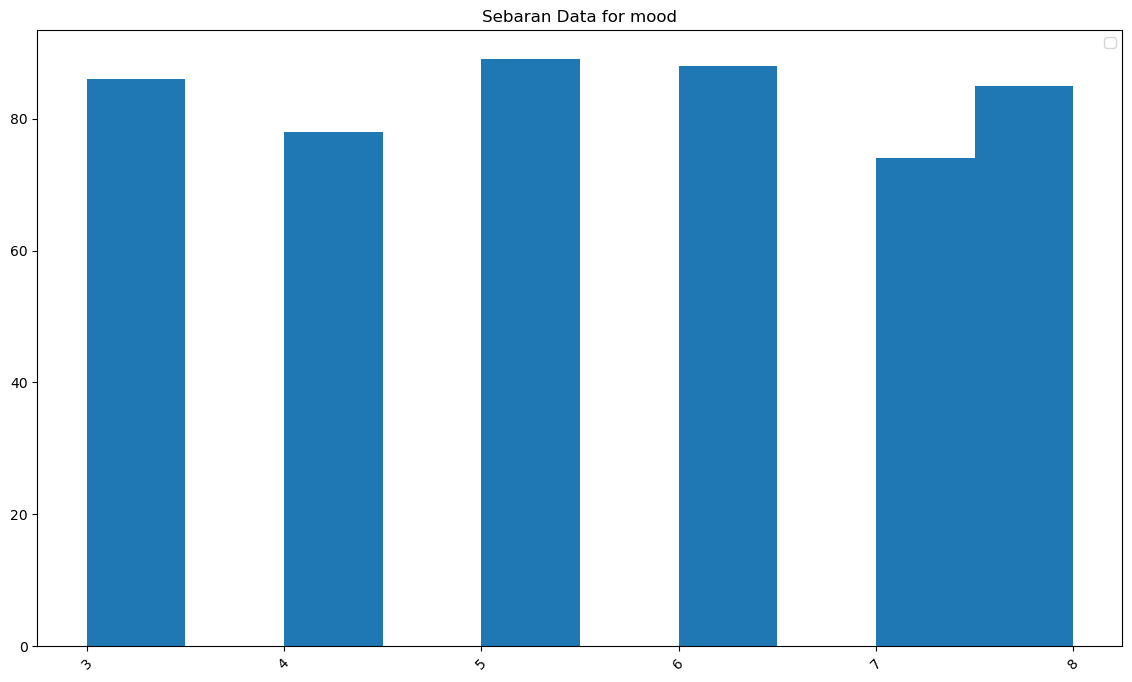

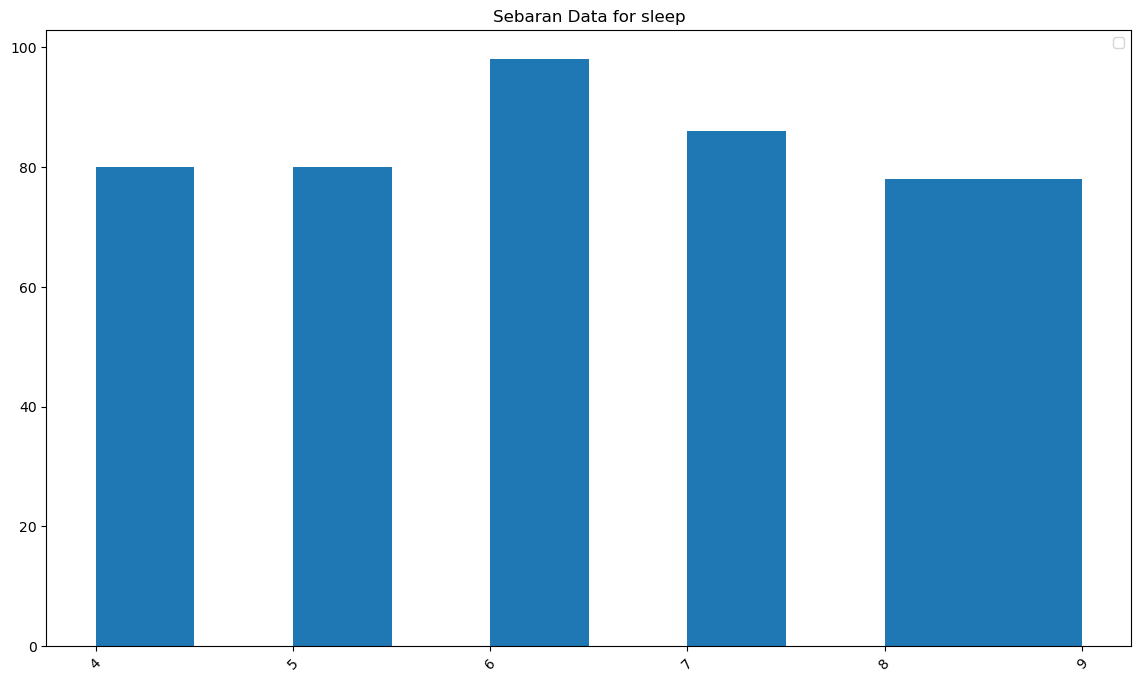

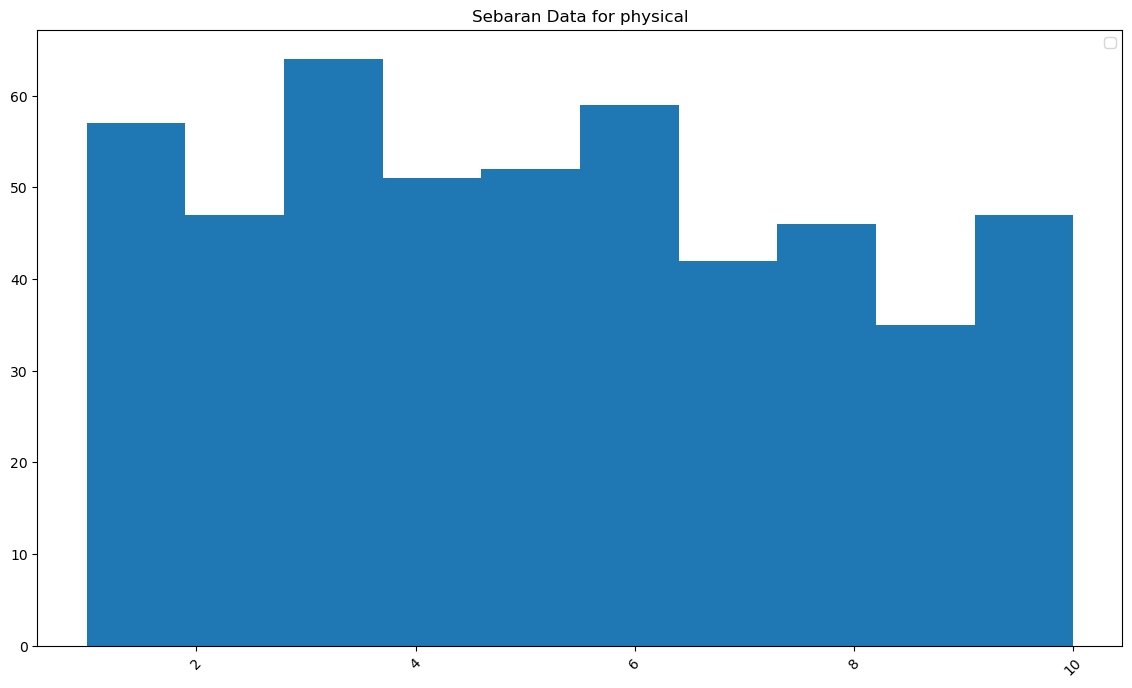

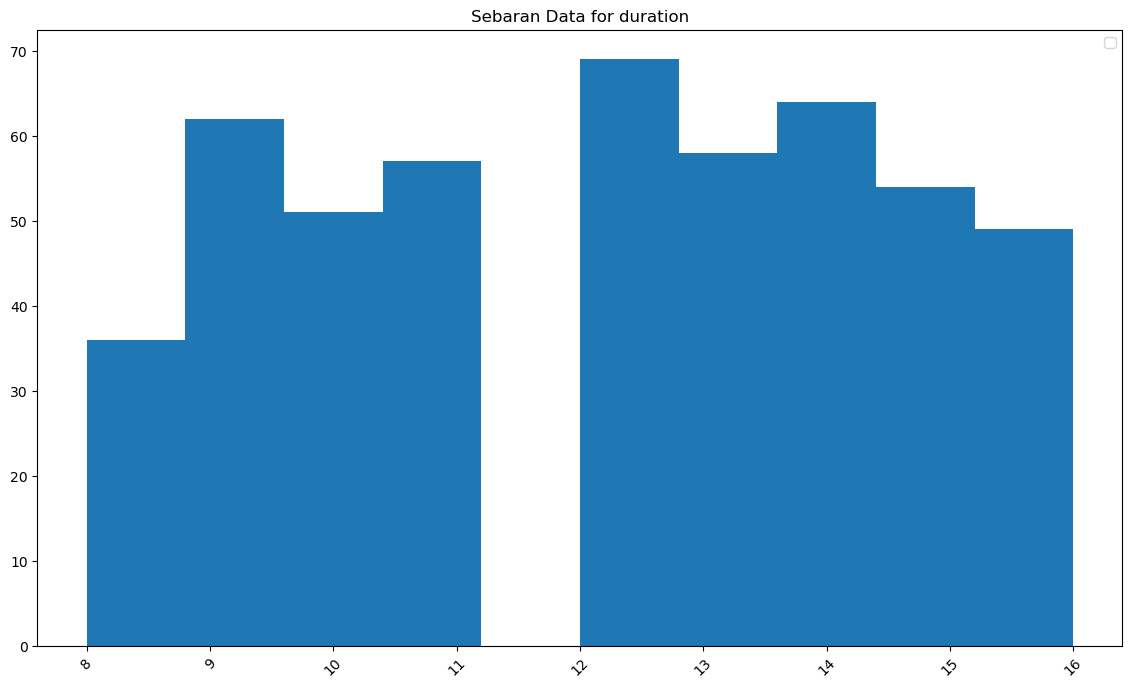

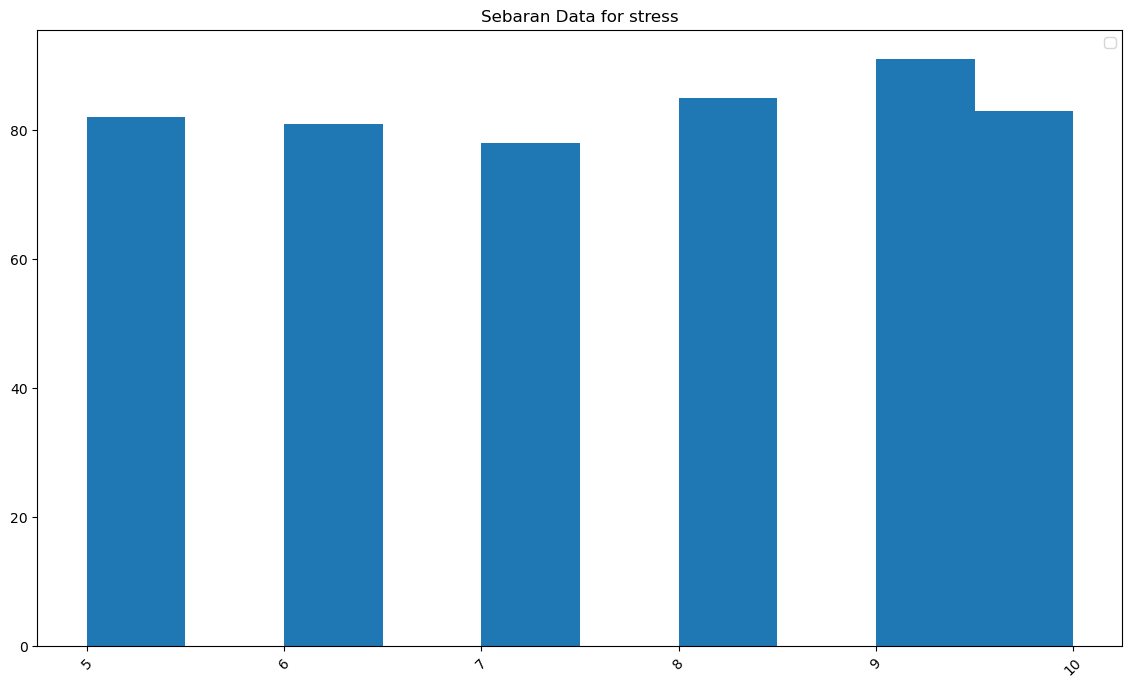

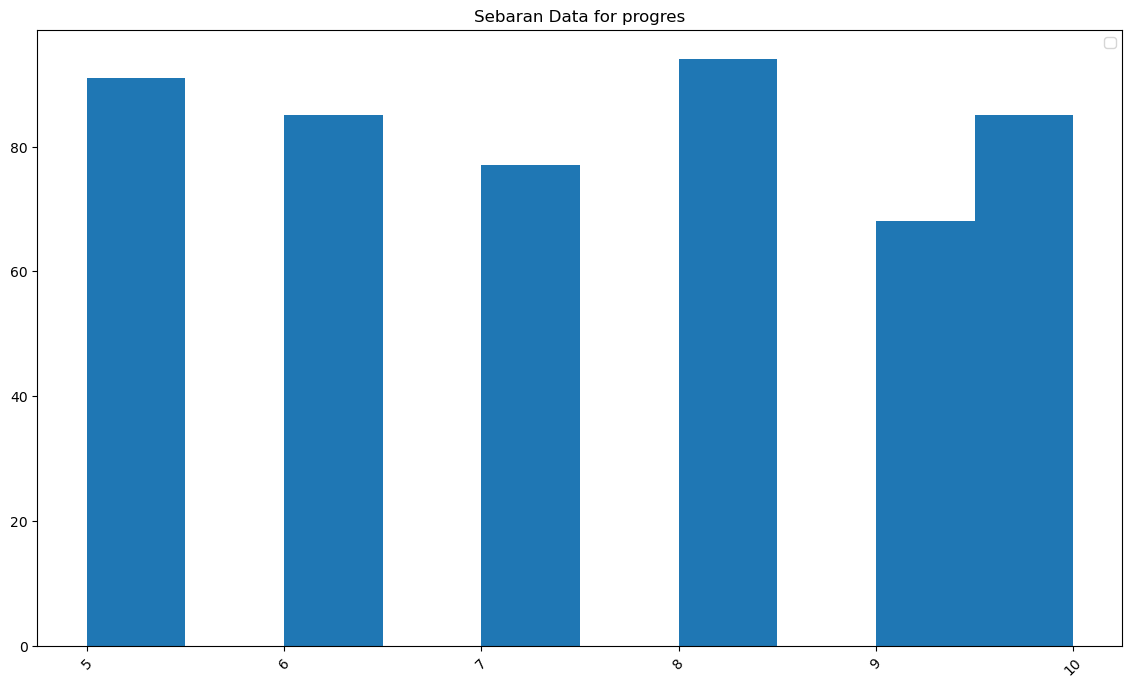

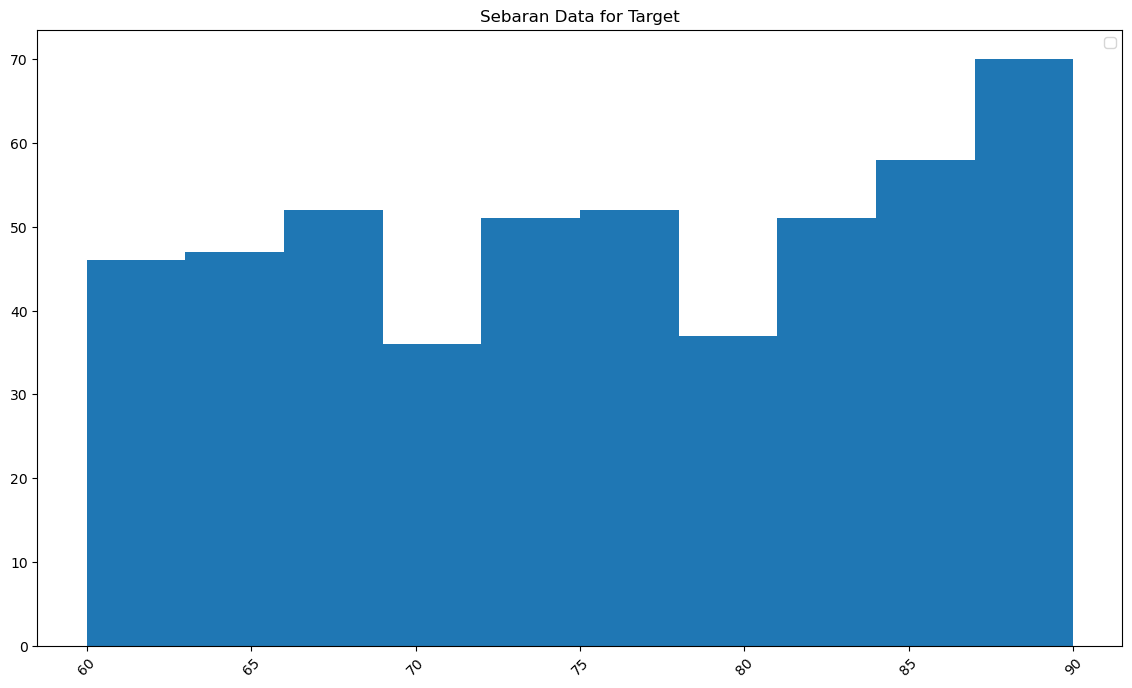

In [175]:
#melihat sebaran secara histogram untuk kolom numerik

for col in df_num.columns:
    plt.figure(figsize=(14, 8))
    # Use the actual column data for value_counts
    plt.hist(df_num[col])
    plt.title(f"Sebaran Data for {col}")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

### Ukuran Pemusatan Data 

#### A. Rata-rata

In [178]:
# Memanggil Rata-rata 
mean = pd.DataFrame({"Kolom": df_num.columns.values,
                     "Rata-rata": df_num.mean(),
                     "No": np.arange(1,len(df_num.columns.values)+1,1)
                    })
mean.set_index('No',inplace=True)
np.array(mean["Kolom"])

array(['Age', 'symptom', 'mood', 'sleep', 'physical', 'duration',
       'stress', 'progres', 'Target'], dtype=object)

#### B. Modus 

In [180]:
# Memanggil modus
modus = df_num.mode().transpose()
modus["No"] = np.arange(1,len(modes)+1,1)
modus["Kolom"] = ['Age', 'symptom', 'mood', 'sleep', 'physical', 'duration',
       'stress', 'progres', 'Target']
modus.set_index('No')

NameError: name 'modes' is not defined

#### C. Median

In [ ]:
# Memanggil Median
median = pd.DataFrame({"Kolom": df_num.columns.values,
                     "Median": df_num.median(),
                     "No": np.arange(1,len(df_num.columns.values)+1,1)
                    })
median.set_index('No',inplace=True)
median

In [ ]:
gab1 = mean.join(modus.set_index('Kolom'), on='Kolom')
center = gab1.join(median.set_index('Kolom'), on='Kolom')
center.drop('No',axis=1)

In [ ]:
center.rename(columns={0:'Modus'})

In [ ]:
center

In [ ]:
cen=center.set_index('Kolom')
centert = cen.transpose()
centert["Kol"]= ["Rata-Rata","Modus","Median"]
centert=pd.DataFrame(centert)
centert.info()

In [ ]:
for col in centert.columns:
    if col != "Kol":  # Avoid plotting "Kol" against itself
        plt.figure(figsize=(14, 8))
        sns.barplot(x=centert["Kol"], y=centert[col], hue =centert["Kol"])  # x is "Kol", y is the current column
        plt.title(f"Tabel Ukuran Pemusatan: {col}")
        plt.xlabel("Kol")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.show()


Dari analisis tabel pemusatan data di atas terlihat bahwa ukuran nilai rata-rata cenderung memiliki nilai yang lebih tinggi daripada nilai modus dan median, hal ini menjadi indikasi bahwa adanya data yang berdistribusi agak sedikit menceng.

### Ukuran Persebaran Data

#### A. Varians/Ragam dan Standar Baku

Nilai Varians/Ragam adalah ukuran statistik yang umum dan penting digunakan untuk melihat seberapa besar data tersebut tersebar, dan selisih antara data dengan nilai rata-rata dari data di variabel sekaligus juga sebagai koefisien penting dalam mengecek Standar Error dari suatu variabel.

In [ ]:
Ragam = pd.DataFrame({'Kolom':df_num.columns.values,
              'Varians': df_num.var(),
             'Standar Baku':df_num.std()})
Ragam

Dari data numerik di atas, dapat terlihat bahwa untuk variabel umur/age nilai varians cukup tinggi yang menandakan bahwa adanya kemungkinan heterogenitas usia responden yang cukup tinggi

#### B. Skewness and Kurtosis

In [ ]:
Sebar = pd.DataFrame({'Kolom':df_num.columns.values,
              'Skewness': df_num.skew(),
             'kurtosis':df_num.kurtosis()})
Sebar

In [ ]:
# Menampilkan grafik skewness
for col in df_num.columns:
    sns.kdeplot(data=df_num[col], fill=True, color='green')
    plt.title(f'Plot skewness untuk kolom {col}')
    plt.xlabel('Kolom')
    plt.ylabel('Kepadatan')
    plt.show()



In [ ]:
# Menampilkan grafik kurtosis

for col in df_num.columns:  
    plt.figure(figsize=(14, 8))
    sns.histplot(df_num[col], kde=True, color='blue') 
    plt.title(f'Distribusi dan analisis untuk kurtosis pada kolom {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


Dari ukuran Skewness dan kurtosis dapat terlihat bahwa untuk variabel 'symptom', 'duration','stress' dan 'target' memiliki nilai negatif yang berarti data agak sedikit menceng ke kiri, kolom sisanya cenderung simetris(nilai mendekati 0) sehingga data bisa dikatakan berdistribusi hampir normal/mendekati distribusi normal. Sedangkan dari nilai kurtosis dan dari grafik yang ditampilkan nilai dibawah 0 dan memiliki keruncingan yang rendah (tumpul)

#### C. Kuartil dan Kuantil

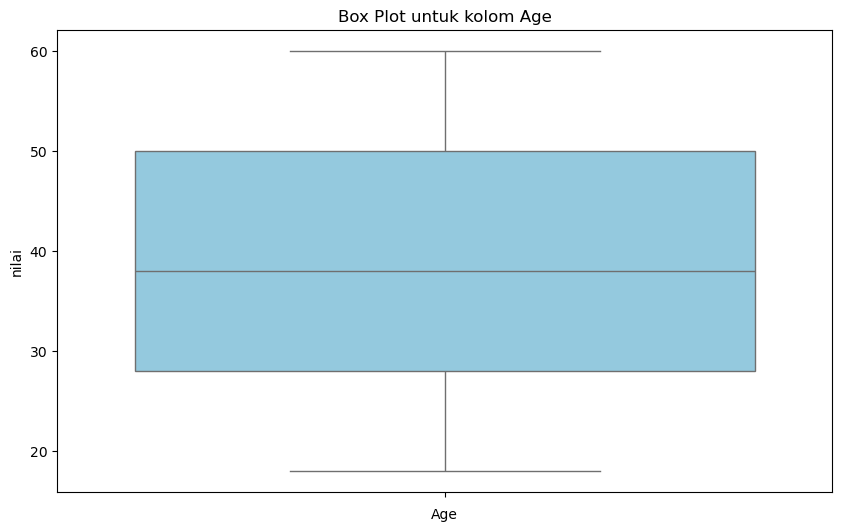

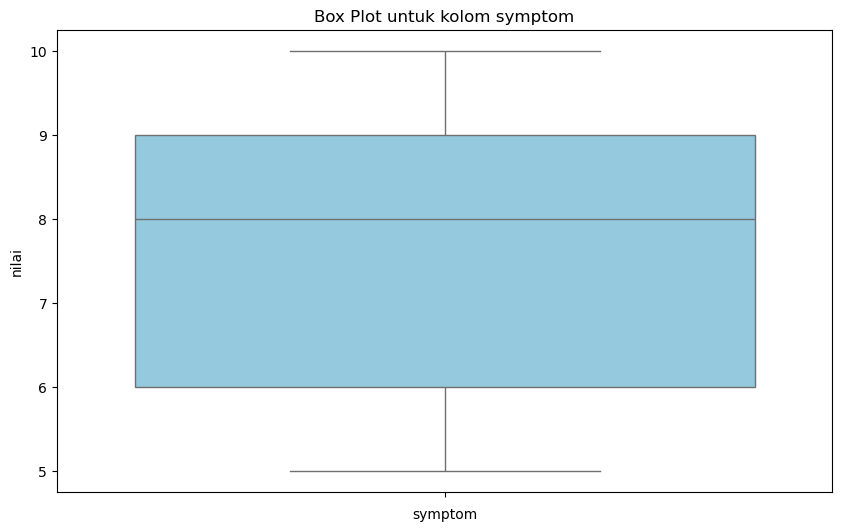

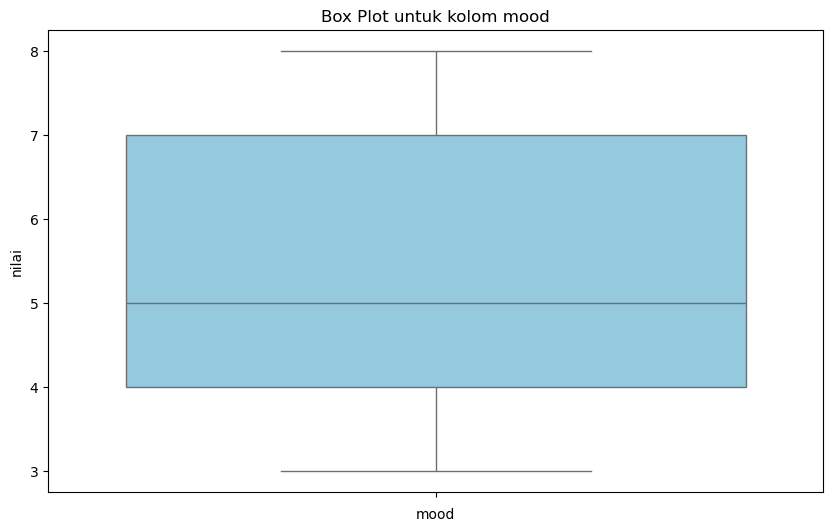

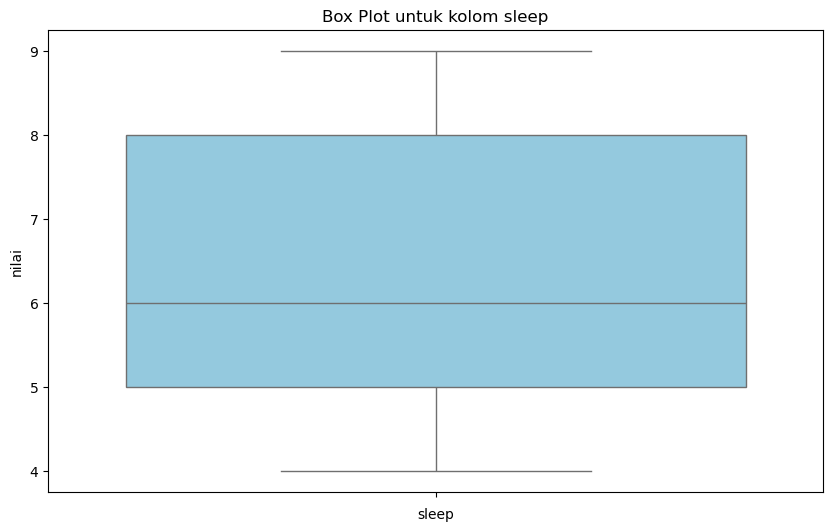

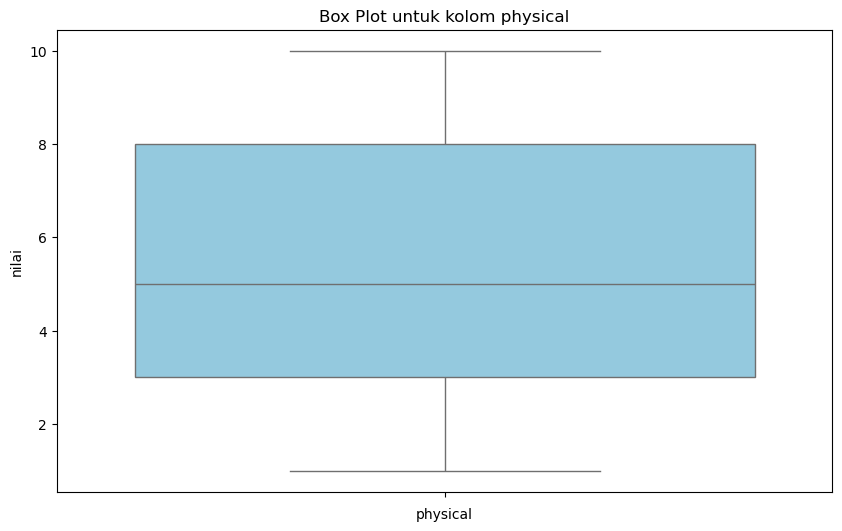

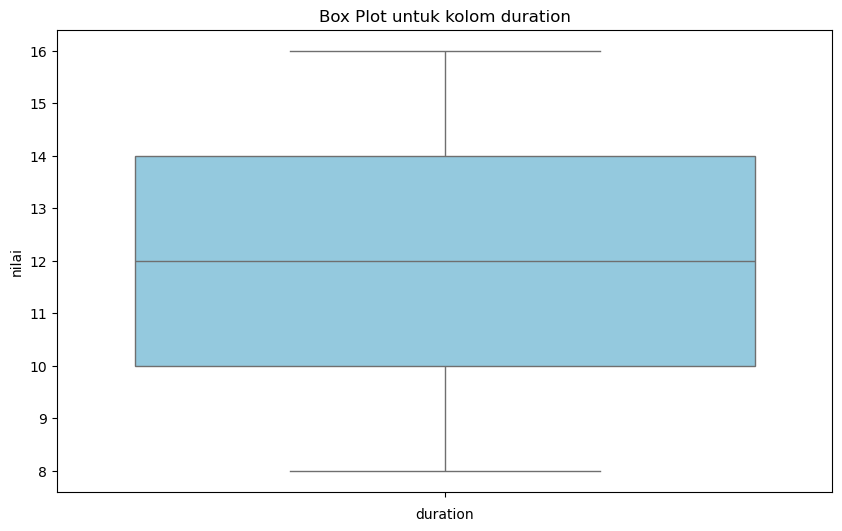

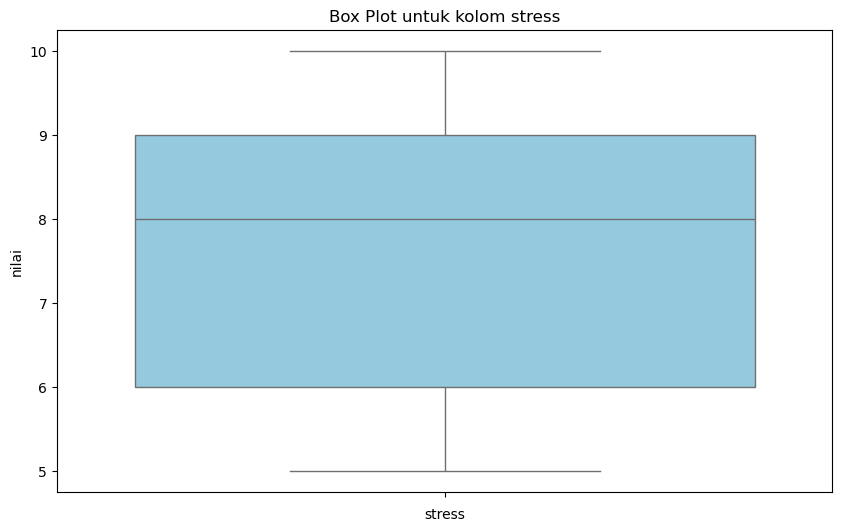

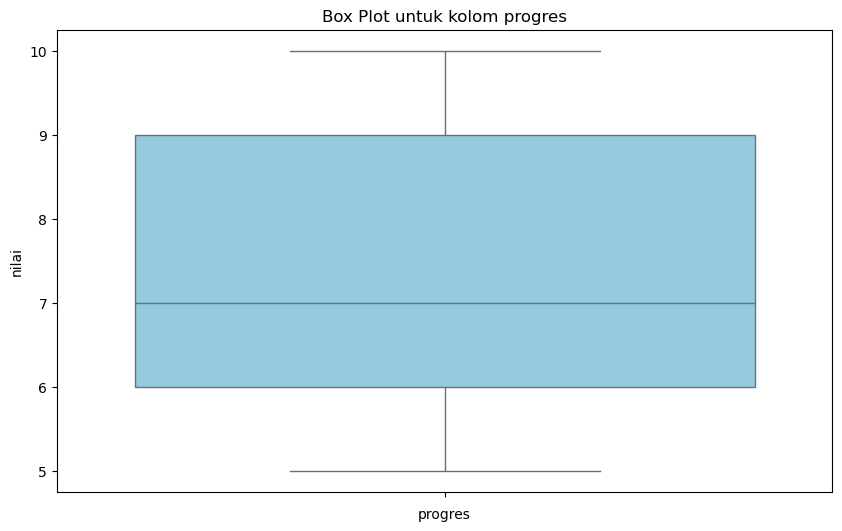

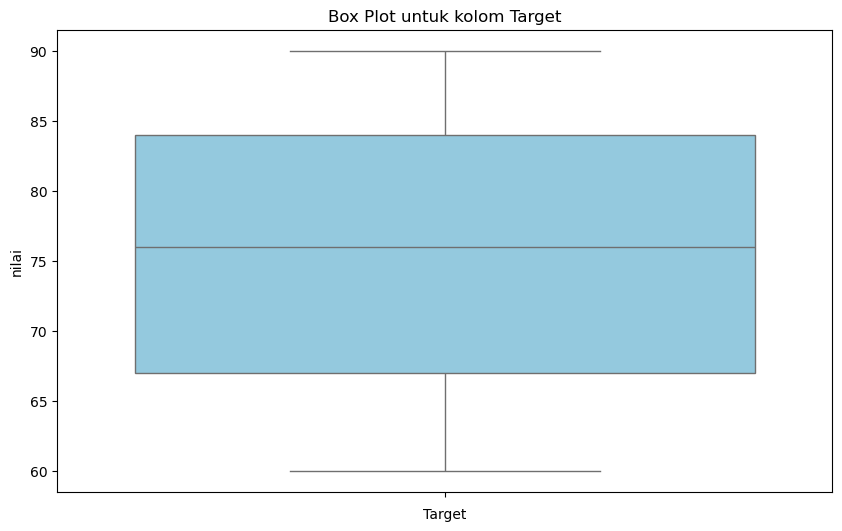

In [191]:
# Kuartil
import seaborn as sns
import matplotlib.pyplot as plt

# menampilkan boxplot untuk kuartil
for col in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_num[col], color="skyblue")
    plt.title(f'Box Plot untuk kolom {col}')
    plt.xlabel(col)
    plt.ylabel('nilai')
    plt.show()


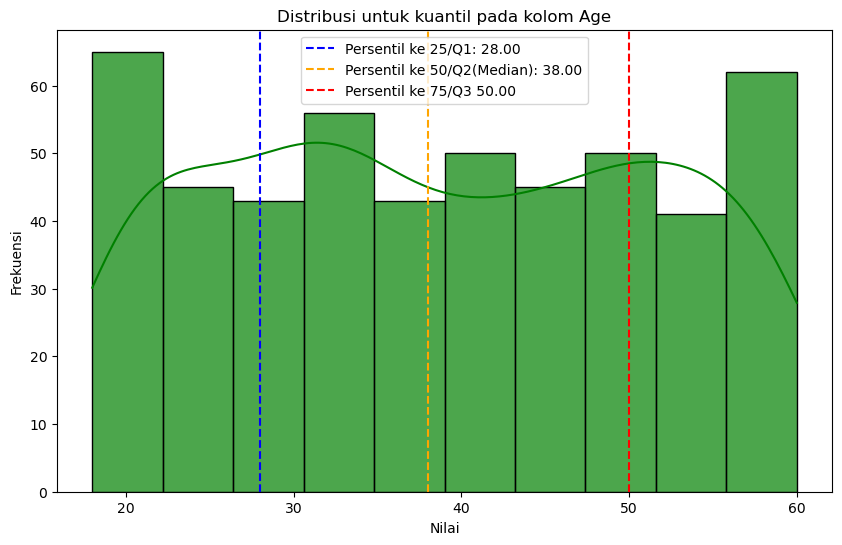

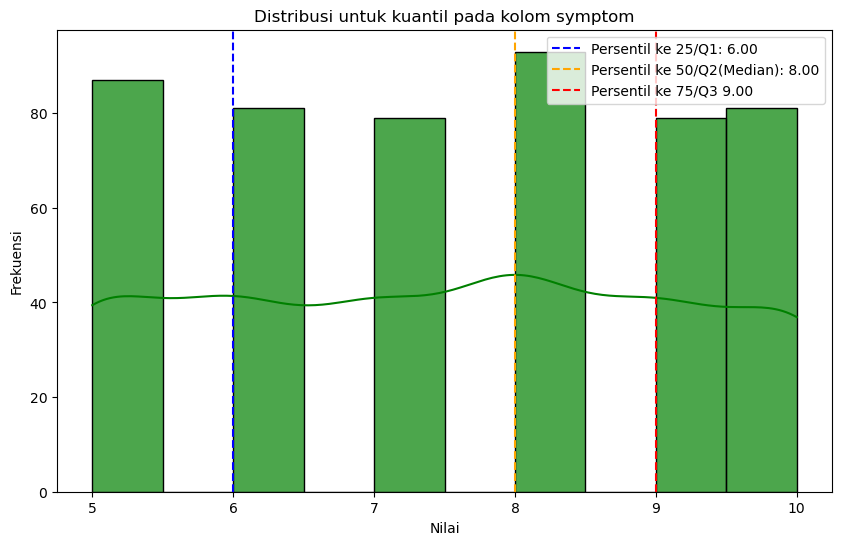

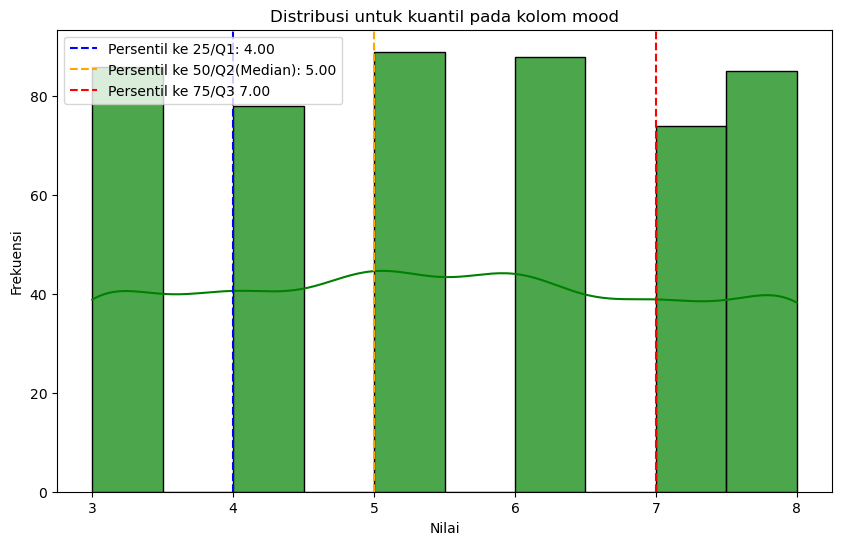

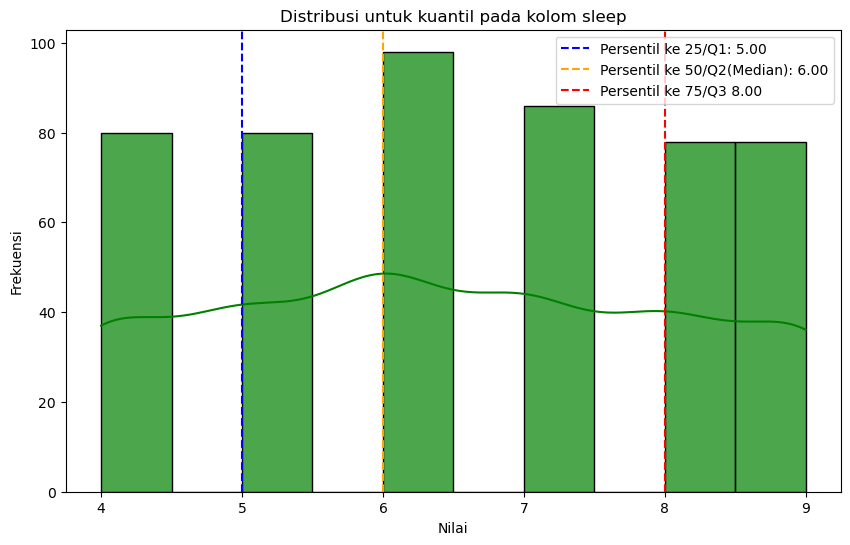

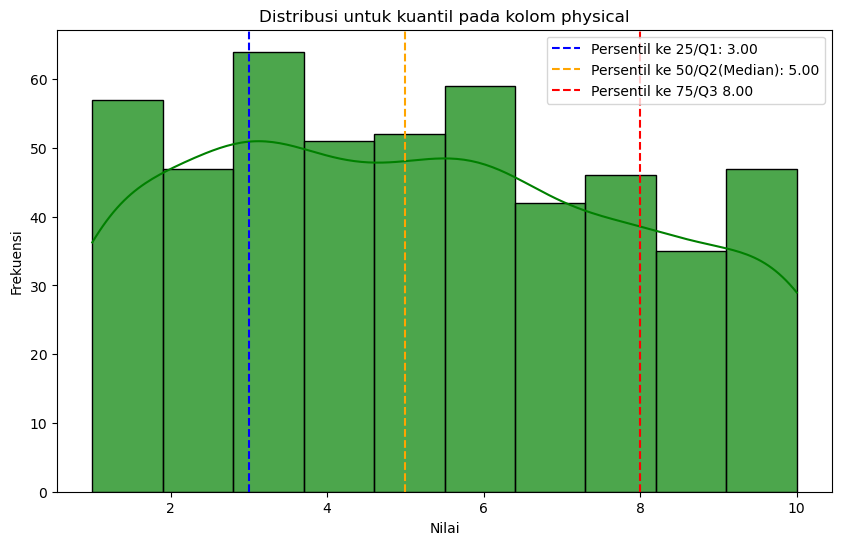

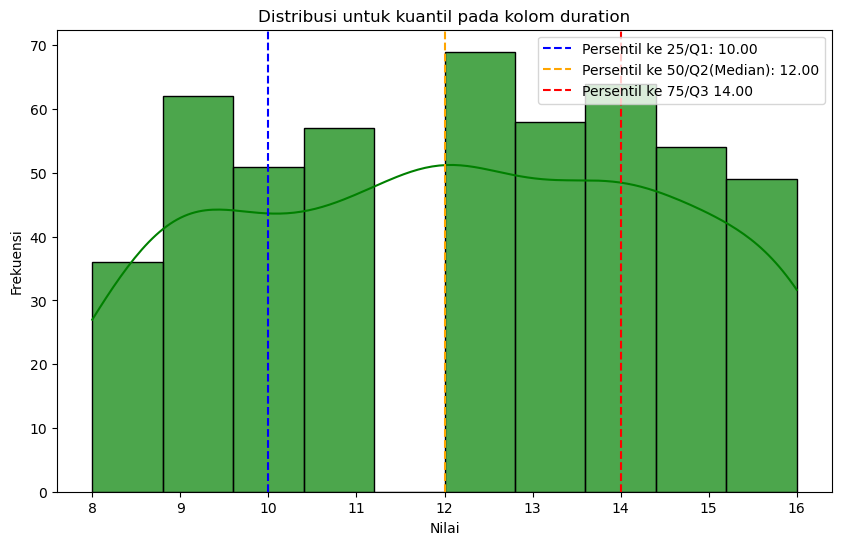

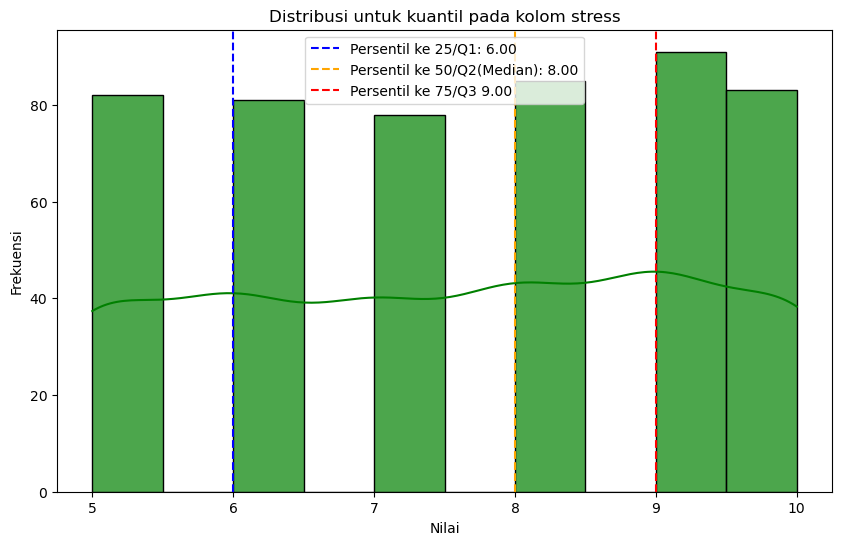

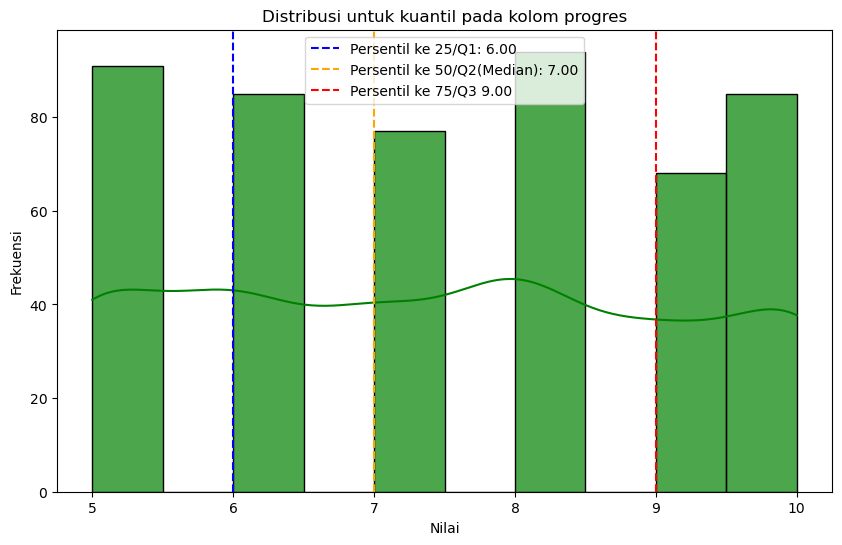

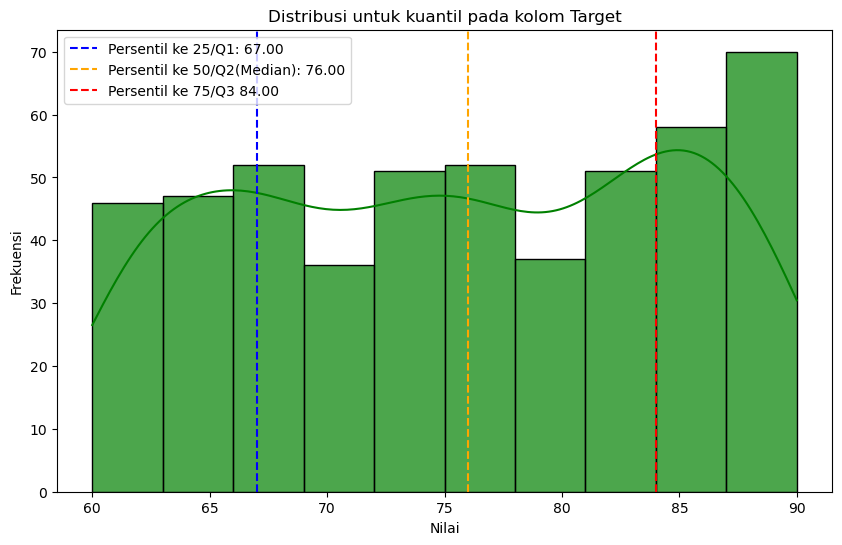

In [192]:


for col in df_num.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_num[col], kde=True, color="green", alpha=0.7)
    
    # Melihat kuartil dan kuantil data
    q25 = np.percentile(df_num[col], 25)
    q50 = np.percentile(df_num[col], 50)  # Median
    q75 = np.percentile(df_num[col], 75)
    
    plt.axvline(q25, color="blue", linestyle="--", label=f"Persentil ke 25/Q1: {q25:.2f}")
    plt.axvline(q50, color="orange", linestyle="--", label=f"Persentil ke 50/Q2(Median): {q50:.2f}")
    plt.axvline(q75, color="red", linestyle="--", label=f"Persentil ke 75/Q3 {q75:.2f}")
    
    plt.title(f'Distribusi untuk kuantil pada kolom {col}')
    plt.xlabel('Nilai')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()


Dari hasil grafik Boxplot dapat terlihat bahwa data numerik yang terdapat di dalam dataset hampir tidak terlihat adanya outlier dari semua kolom numerik, sedangkan dari data kuantil dapat dilihat posisi pemusatan data berada di sebelah data bagian kanan/kiri namun posisi median masih cenderung berada di tengah.

## 5.4 Label Encoder

Label Encoder digunakan untuk melakukan kodifikasi terhadap variabel yang memiliki nilai kategorik menjadi nilai yang bersifat kuantitatif (non kategorik).

Sebelum kita mengubah variabel kedalam label encoder, kita perlu memisahkan data-data yang bersifat kategorik yang akan kita transform ke label encoder

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Patient ID  500 non-null    int64         
 1   Age         500 non-null    int64         
 2   Gender      500 non-null    object        
 3   Diagnosis   500 non-null    object        
 4   symptom     500 non-null    int64         
 5   mood        500 non-null    int64         
 6   sleep       500 non-null    int64         
 7   physical    500 non-null    int64         
 8   Medication  500 non-null    object        
 9   Therapy     500 non-null    object        
 10  treatment   500 non-null    datetime64[ns]
 11  duration    500 non-null    int64         
 12  stress      500 non-null    int64         
 13  Outcome     500 non-null    object        
 14  progres     500 non-null    int64         
 15  AIstate     500 non-null    object        
 16  Target      500 non-null  

Dari dataset yang kita miliki terdapat beberapa variabel yang perlu dilakukan transformasi data ke label encoder diantaranya : 
- Gender
- family_history_with_overweight
- FAVC
- CAEC
- SMOKE
- SCC
- CALC
- MTRANS 
- NObeyesdad

untuk membedakan hasil antara data yang telah dilakukan encoding dengan yang tidak maka kita perlu membuat 1 duplikat data dari data set awal df menjadi 'data label encoder' atau dle

In [201]:
dle = df.copy()
dle.head()

,Patient ID,Age,Gender,Diagnosis,symptom,mood,sleep,physical,Medication,Therapy,treatment,duration,stress,Outcome,progres,AIstate,Target
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [202]:
dle[["Gender","Diagnosis","Medication","Therapy","Outcome","AIstate"]].head(10)

,Gender,Diagnosis,Medication,Therapy,Outcome,AIstate
0,Female,Major Depressive Disorder,Mood Stabilizers,Interpersonal Therapy,Deteriorated,Anxious
1,Female,Major Depressive Disorder,Antipsychotics,Interpersonal Therapy,No Change,Neutral
2,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Deteriorated,Happy
3,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Deteriorated,Excited
4,Male,Panic Disorder,Anxiolytics,Interpersonal Therapy,Deteriorated,Excited
5,Male,Panic Disorder,SSRIs,Cognitive Behavioral Therapy,No Change,Stressed
6,Male,Generalized Anxiety,Mood Stabilizers,Dialectical Behavioral Therapy,Deteriorated,Anxious
7,Female,Major Depressive Disorder,Antidepressants,Cognitive Behavioral Therapy,No Change,Stressed
8,Female,Major Depressive Disorder,Antidepressants,Mindfulness-Based Therapy,No Change,Neutral
9,Female,Panic Disorder,Antidepressants,Cognitive Behavioral Therapy,No Change,Depressed


In [203]:
from sklearn.preprocessing import LabelEncoder
# Melakukan label Encoder
le = LabelEncoder()
for col in dle[["Gender","Diagnosis","Medication","Therapy","Outcome","AIstate"]].columns:
    array = np.array(dle[col].unique())
    le.fit(array)
    encoded_labels = le.transform(dle[col].unique())
    print(encoded_labels) 
    original_labels = le.inverse_transform(encoded_labels)
    print(original_labels)
  # Memaskukan Variabel Transformasi pada Dataset
    dle[f'En_{col}'] = le.fit_transform(dle[col])
dle.tail()

[0 1]
['Female' 'Male']
[2 3 1 0]
['Major Depressive Disorder' 'Panic Disorder' 'Generalized Anxiety'
 'Bipolar Disorder']
[4 1 5 2 0 3]
['Mood Stabilizers' 'Antipsychotics' 'SSRIs' 'Anxiolytics'
 'Antidepressants' 'Benzodiazepines']
[2 3 0 1]
['Interpersonal Therapy' 'Mindfulness-Based Therapy'
 'Cognitive Behavioral Therapy' 'Dialectical Behavioral Therapy']
[0 2 1]
['Deteriorated' 'No Change' 'Improved']
[0 4 3 2 5 1]
['Anxious' 'Neutral' 'Happy' 'Excited' 'Stressed' 'Depressed']


,Patient ID,Age,Gender,Diagnosis,symptom,mood,sleep,physical,Medication,Therapy,treatment,duration,stress,Outcome,progres,AIstate,Target,En_Gender,En_Diagnosis,En_Medication,En_Therapy,En_Outcome,En_AIstate
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73,1,1,4,1,1,1
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86,1,3,3,3,0,3
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87,1,2,0,0,0,4
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73,1,0,0,3,1,0
499,500,58,Male,Bipolar Disorder,5,7,6,2,SSRIs,Cognitive Behavioral Therapy,2024-03-24,10,6,Deteriorated,5,Happy,70,1,0,5,0,0,3


## 5.5 Korelasi Pearson

Pada langkah ini dilakukan pendeteksian seberapa kuat hubungan antara 2 variabel yang terdapat pada data set obesitas dengan rentang nilai -1 hingga 1 tetapi korelasi Pearson tidak memberikan informasi tentang penyebab dan akibat.

- Jika mendekati 1 maka menunjukkan hubungan linear positif antara 2 variabel
- Jika mendekati -1 maka menunjukkan hubungan linear negatif antara 2 variabel
- Jika mendekati 0 maka tidak ada hubungan

In [206]:
df_kat.columns.values

array(['Gender', 'Diagnosis', 'Medication', 'Therapy', 'Outcome',
       'AIstate'], dtype=object)

In [207]:
# Menghitung korelasi antar kolom pada DataFrame 'df' menggunakan metode korelasi Pearson
df
pearson_corr = dle.drop(['Gender', 'Diagnosis', 'Medication', 'Therapy', 'Outcome',
       'AIstate','treatment'],axis=1).corr(method='pearson')

# Menampilkan nilai korelasi antar kolom dalam bentuk tabel
pearson_corr


,Patient ID,Age,symptom,mood,sleep,physical,duration,stress,progres,Target,En_Gender,En_Diagnosis,En_Medication,En_Therapy,En_Outcome,En_AIstate
Patient ID,1.000000,0.023352,-0.025521,-0.032326,0.011557,0.009613,-0.037996,0.029450,-0.064460,0.008495,0.029964,-0.017007,0.014153,-0.029859,-0.109309,0.041618
Age,0.023352,1.000000,-0.029307,0.033086,-0.015412,0.000531,-0.107012,-0.038351,0.014498,-0.022374,-0.026300,-0.059438,0.014496,-0.016006,-0.120919,-0.026362
symptom,-0.025521,-0.029307,1.000000,0.050077,0.037451,-0.003165,0.008522,-0.018921,-0.005586,-0.049310,-0.073244,-0.066564,0.027075,0.074246,-0.003271,0.001179
mood,-0.032326,0.033086,0.050077,1.000000,0.064199,0.021962,-0.078622,-0.075265,0.052336,0.041277,-0.054543,0.022068,0.002921,-0.055553,0.034341,0.038919
sleep,0.011557,-0.015412,0.037451,0.064199,1.000000,-0.007632,0.007402,0.036606,0.082247,0.018225,-0.104750,-0.055642,-0.045535,-0.021608,-0.010842,-0.041945
physical,0.009613,0.000531,-0.003165,0.021962,-0.007632,1.000000,-0.043202,0.013451,0.002838,-0.053863,0.039059,-0.022092,0.039729,-0.074231,-0.056993,-0.086281
duration,-0.037996,-0.107012,0.008522,-0.078622,0.007402,-0.043202,1.000000,0.037554,-0.001418,-0.065593,0.012723,-0.031056,-0.032703,-0.080661,0.054865,0.053728
stress,0.029450,-0.038351,-0.018921,-0.075265,0.036606,0.013451,0.037554,1.000000,0.001933,-0.030839,-0.019181,0.006087,-0.004979,-0.080786,-0.029560,-0.024896
progres,-0.064460,0.014498,-0.005586,0.052336,0.082247,0.002838,-0.001418,0.001933,1.000000,-0.028505,0.051224,0.093322,-0.009043,-0.013996,0.083222,0.007203
Target,0.008495,-0.022374,-0.049310,0.041277,0.018225,-0.053863,-0.065593,-0.030839,-0.028505,1.000000,-0.024180,-0.054861,0.018883,0.007485,0.025353,0.021847


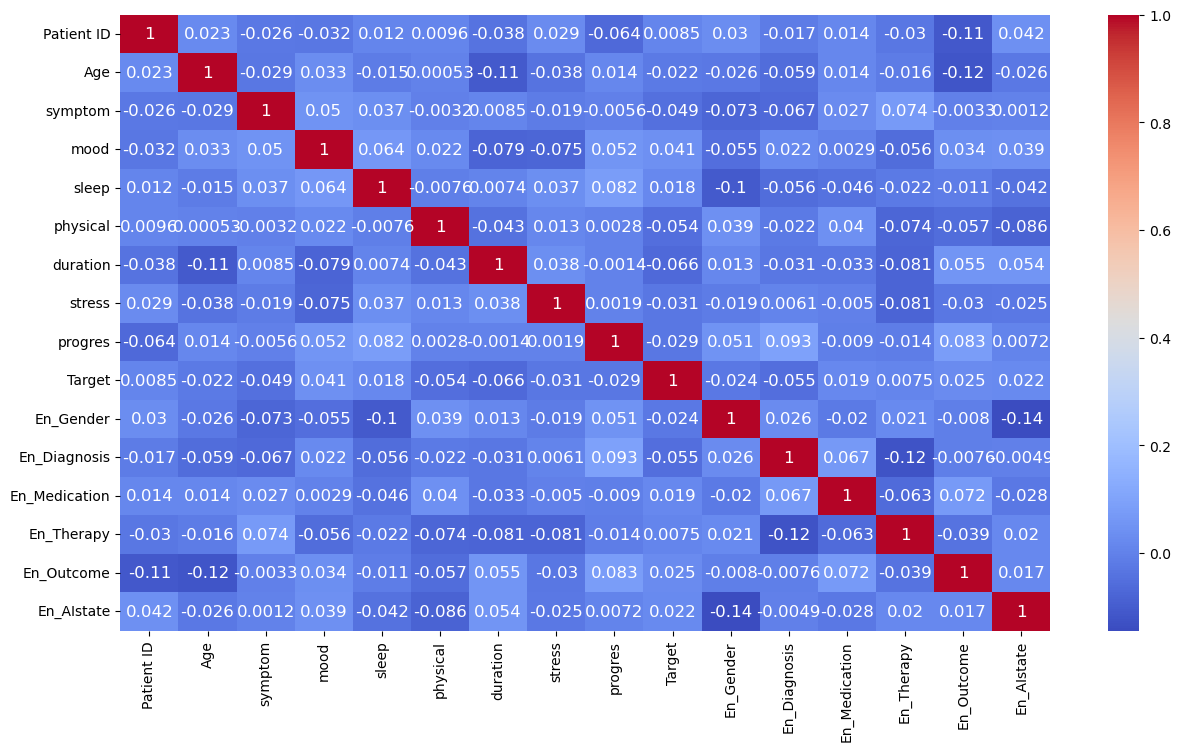

In [209]:
# Membuat gambar plot dengan ukuran (figsize) 15x8
plt.figure(figsize=(15, 8))

# Membuat heatmap menggunakan seaborn untuk memvisualisasikan matriks korelasi
# Parameter 'cmap' mengatur skema warna heatmap menjadi 'Reds'
# Parameter 'annot=True' mengaktifkan penulisan nilai korelasi di dalam sel
# Parameter 'annot_kws={'fontsize':12}' mengatur ukuran font untuk nilai korelasi menjadi 12
sns.heatmap(pearson_corr, cmap='coolwarm', annot=True, annot_kws={'fontsize': 12})

# Menampilkan gambar plot
plt.show()


# 6. Preprocessing Data

Pada tahapan ini akan dilakukan beberapa perapihan data yang sekiranya perlu untuk dilakukan, seperti pengecekan outlier, penghapusan outlier, pengisian data missing value dan tindakan lainnya bila diperlukan.

## 6.1. Deteksi dan menangani Outlier

In [219]:
# Melakukan copy data
dle1 = dle.copy()

# Melihat susunan kolom dataset
dle1.columns.values

array(['Patient ID', 'Age', 'Gender', 'Diagnosis', 'symptom', 'mood',
       'sleep', 'physical', 'Medication', 'Therapy', 'treatment',
       'duration', 'stress', 'Outcome', 'progres', 'AIstate', 'Target',
       'En_Gender', 'En_Diagnosis', 'En_Medication', 'En_Therapy',
       'En_Outcome', 'En_AIstate'], dtype=object)

In [221]:
# Melakukan pengecekan Outlier
kolom = dle1.drop(['Gender', 'Diagnosis', 'Medication', 'Therapy', 'Outcome',
       'AIstate','treatment'],axis=1)

In [ ]:
kolom.info()

In [ ]:
# Membuat iterasi pengecekan outlier dengan boxplot
plt.figure(figsize=(14,8))
sns.boxplot(data=kolom)
plt.title("Boxplot untuk dataset")
plt.show()

Dari boxplot diatas dapat terlihat bahwa ke semua variabel yang ada di dataset tidak terlihat memiliki adanya outlier

## 7. Model Inference

In [224]:
#Memanggil library dan model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
pr = PolynomialFeatures(degree=2)
rr = Ridge()
ls = Lasso()
dr = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
xg = XGBRegressor()



## 8. Pelatihan Model

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Feature matrix and target vector
X = kolom.drop(['Patient ID', 'Target'], axis=1)  # Feature columns
y = kolom['Target']  # Target variable

# Models and their names
models = [lr, rr, ls, dr, gb, xg]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
         'Decision Tree Regression', 'Gradient Boosting Regressor', 'Extreme Gradient Boosting Regressor']

# Test size ratios
tests = [0.2, 0.3, 0.4]

# Loop through models and test sizes
for name, model in zip(names, models):
    print("===========================================================")
    print(f"================ {name} =================")
    print("===========================================================")
    for test in tests:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=42)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = model.predict(X_test)  # Corrected variable assignment
        y_pred_train = model.predict(X_train)     
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)  # Corrected usage of y_pred
        r2train = r2_score(y_train, y_pred_train)
        mse = mean_squared_error(y_test, y_pred)  # Corrected usage of y_pred
        msetrain = mean_squared_error(y_train, y_pred_train)
        
        # Print metrics
        print(f"R-squared {name} ratio {test}: {r2:.4f}")        
        print(f"Mean Squared Error {name} ratio {test}: {mse:.4f}")
        print("--------------------------------------------------------")
        print(f"R-squared train {name} ratio {test}: {r2train:.4f}")
        print(f"Mean Squared Error train {name} ratio {test}: {msetrain:.4f}")
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        
    print("===========================================================")



================ Linear Regression =================
R-squared Linear Regression ratio 0.2: 0.0038
Mean Squared Error Linear Regression ratio 0.2: 82.7869
--------------------------------------------------------
R-squared train Linear Regression ratio 0.2: 0.0184
Mean Squared Error train Linear Regression ratio 0.2: 80.6732
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
R-squared Linear Regression ratio 0.3: -0.0201
Mean Squared Error Linear Regression ratio 0.3: 85.0001
--------------------------------------------------------
R-squared train Linear Regression ratio 0.3: 0.0195
Mean Squared Error train Linear Regression ratio 0.3: 80.2571
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
R-squared Linear Regression ratio 0.4: -0.0287
Mean Squared Error Linear Regression ratio 0.4: 81.8249
--------------------------------------------------------
R-squared train Linear Regression ratio 0.4: 0.0227
Mean Squared Error train Linear Regression ratio 0.4: 82.2984
++++++++++++

## 9. Seleksi Model

In [ ]:
f_i = list(zip(kolom,lr.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

menghapus kolom yang memiliki nilai yang rendah yaitu **En_FAVC, En_SCC, En_Fam, En_CALC, En_SMOKE, En_CAEC**

## 10. Model Inference

In [ ]:
test1 = {'Age' : [15,25,38],
         'Height' : [165,178,183],
         'Weight' : [76,64,59],
         'FCVC' : [0,1,2],
         'NCP' : [3,1,2],
         'CH2O' : [2,1,1],
         'FAF' : [0,2,3],
         'TUE' : [0,0,1],
         'En_Fam' : [0,1,1],
         'En_FAVC' : [0,1,1],
         'En_CAEC' : [2,1,1],
         'En_SMOKE' : [0,0,1],
         'En_SCC' : [0,1,0],
         'En_CALC' : [0,1,0],
         'En_MTRANS ' : [2,3,4],
         'En_Gender' : [1,0,1]
        }
test1 = pd.DataFrame(test1)
test1

## 11. Referensi dan Seleksi Variabel pada Model 

Berdasarkan penelitian yang dilakukan oleh RezkiaNadiaPutri,et al 2022, Terdapat beberapa Faktor yang berhubungan dengan kejadian obesitas sentral pada remaja usia 15-18 tahun di Provinsi DKI Jakarta, faktor tersebut diantaranya : 
1. Jenis Kelamin 
2. Status Merokok

sumber : https://ejournal.undip.ac.id/index.php/mkmi/article/view/43473/22052

sedangkan menurut Syifa Arifani dan Zulia Setiyaningrum, 2021, adapun faktor Perilaku Berisiko Yang Berhubungan Dengan Kejadian diantaranya : 
1. Perilaku merokok
2. Makanan Manis
3. Minuman Manis
4. Soft Drink
5. Makanan Instan

pada poin ke 2 s.d 4 terdapat hubungan antara variabel yang digunakan pada dataset, yaitu pola konsumsi makanan tinggi kalori. 
sumber : https://www.bing.com/ck/a?!&&p=2193fd3a35a03985b63f4d265b23988b71822176abb5cdf5c9fccb785e40d1c1JmltdHM9MTc0MTgyNDAwMA&ptn=3&ver=2&hsh=4&fclid=161541b8-bd45-6014-2770-5064bc25616b&psq=penyebab+obesitas+jurnal&u=a1aHR0cHM6Ly9qb3VybmFscy51bXMuYWMuaWQvaW5kZXgucGhwL2prL2FydGljbGUvZG93bmxvYWQvMTM3MzgvcGRm&ntb=1


berdasarkan hal tersebut maka perlu dilakukan uji korelasi antara variabel prediktor dengan variabel target melalui uji statistik untuk menentukan apakah variabel tersebut dapat kita gunakan ke dalam model.

In [ ]:
df_clean2.info()

## Uji Korelasi Matrix

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import t

# Example correlation matrix
correlation_matrix = korelasi

# Assume a sample size (n)
n = 10  # Replace with your actual sample size
df = n - 2  # Degrees of freedom

# Function to compute p-value matrix from correlation matrix
def calculate_pval_from_corr(corr_matrix, sample_size):
    n = sample_size
    df = n - 2
    t_values = corr_matrix * np.sqrt(df / (1 - corr_matrix**2))  # t-statistic
    p_values = 2 * (1 - t.cdf(abs(t_values), df))  # two-tailed p-values
    np.fill_diagonal(p_values, 0)  # Set diagonal to 0 (self-correlation p-values)
    return p_values

# Compute p-value matrix
pvalue_matrix = calculate_pval_from_corr(correlation_matrix, n)

# Convert to pandas DataFrame for display
pvalue_df = pd.DataFrame(pvalue_matrix, columns=[korelasi.columns], index=[korelasi.columns])
print("P-Value Matrix:")
print(pvalue_df)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# mengambil dataset
dfc = df_clean2.copy()
dfc = dfc.drop(['Age','Height','Weight'],axis=1)

# membuat fungsi Cramers V untuk korelasi data kategorik
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# melakukan looping untuk setiap kolom dataset
columns = dfc.columns
results = {}

for col1 in columns:
    for col2 in columns:
        if col1 != col2:  #menghindari perbandingnan sendiri
            key = f"{col1} vs {col2}"
            results[key] = cramers_v(dfc[col1], dfc[col2])

# hasil
for pair, value in results.items():
    print(f"{pair}: {value:.2f}")



In [ ]:
cramers_v()

## 12. Kesimpulan

In [ ]:
penjelasan

In [ ]:
df_clean2.info()

Dari final proyek yang telah dibuat dapat disimpulkan bahwa : 
dataset yang digunakan berisi 17 kolom dan 1932 baris (setelah dilakukan pembersihan outlier), selanjutnya dilakukan eksplorasi data (bar chart, pie chart, boxplot) dimana dilakukan visualisasi yaitu perbandingan nilai pada kolom obesitas kepada kolom2 lain sebagai variabel.kolom prediktor, diantaranya : 
1. perbandingan Kolom "Age/Usia" dengan "Level Obesitas"
2. perbandingan Kolom "Height/Tinggi badan" dengan "Level Obesitas"
3. perbandingan Kolom "Weight/Berat Badan" dengan "Level Obesitas"
4. perbandingan Kolom "FCVC/Pola Konsumsi Buah-buahan" dengan "Level Obesitas"
5. perbandingan Kolom "NCP/Jumlah makan utama perhari" dengan "Level Obesitas"
6. perbandingan Kolom "CH2O/Pola konsumsi air" dengan "Level Obesitas"
7. perbandingan Kolom "FAF/Frekuensi Aktifitas Fisik" dengan "Level Obesitas"
8. perbandingan Kolom "TUE/Pemakaian Teknologi" dengan "Level Obesitas"
9. perbandingan Kolom "Fam/Riwayat Obesitas Keluarga" dengan "Level Obesitas"
10. perbandingan Kolom "FAVC/Konsumsi makanan tinggi kalori" dengan "Level Obesitas"
11. perbandingan Kolom "CAEC/Konsumsi cemilan dintara waktu makan" dengan "Level Obesitas"
12. perbandingan Kolom "SMOKE/Konsumsi Rokok" dengan "Level Obesitas"
13. perbandingan Kolom "SCC/Kontrol kalori" dengan "Level Obesitas"
14. perbandingan Kolom "CALC/Konsumsi Alkohol" dengan "Level Obesitas"
15. perbandingan Kolom "MTRANS/Transportasi publik yang digunakan" dengan "Level Obesitas"
16. perbandingan Kolom "Gender/Jenis Kelamin" dengan "Level Obesitas"

In [ ]:
labelobes

Dari tabel di atas, terlihat bahwa Kolom **En_Obes** merupakan target yang ingin diprediksi dengan nilai 0-6 yang menunjukkan level atau tingkat keparahan obesitas yang cenderung diderita seseorang, apakah masuk kedalam kategori, kurang berat badan, ideal atau berat badan berlebih hingga level obesitas tertentu. kategori obesitas akan diprediksi berdasarkan bebarapa variabel-variabel prediktor yang sudah dilakukan analisis.


# 13. Program Deployment (basic)

Dari hasil diatas running model terdapat 3 model terbaik yang dapat kita pertimbangkan untuk dibuat deployment nya, yaitu model Random Forest dengan akurasi 95 persen, model Extra Trees dengan akurasi 96 persen dan Gradient Boosting dengan Akurasi 97 persen. Ketiga model tersebut dijalankan dengan mode rasio test 20 persen data tanpa menggunakan oversampling/under sampling

In [ ]:
import joblib
joblib.dump(rf,"model_random_forest.joblib")

In [ ]:
import joblib
joblib.dump(et,"model_extra_trees.joblib")

In [ ]:
import joblib
joblib.dump(gb,"model_gradient_boosting.joblib")

In [ ]:
import pickle
with open ('model_rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [ ]:
import pickle
with open ('model_et.pkl', 'wb') as f:
    pickle.dump(et, f)

In [ ]:
import pickle
with open ('model_gb.pkl', 'wb') as f:
    pickle.dump(gb, f)

In [ ]:
muat_model_rf = joblib.load("model_random_forest.joblib")
muat_model_et = joblib.load("model_extra_trees.joblib")
muat_model_gb = joblib.load("model_gradient_boosting.joblib")

In [ ]:
df_clean2.info()

In [ ]:
def prediksi_obesitas(model) : 
    print("=== Silakan masukkan data pasien ===") 
    Age = float(input("Masukan Usia : "))
    Height = float(input("Masukan Tinggi Badan : "))
    Weight = float(input("Masukan Berat Badan : "))     
    FCVC	= float(input("Frekuensi mengonsumsi buah-buahan (1=Tidak Pernah,2=Jarang, 3 = Sering):"))
    NCP = float(input("Jumlah makanan utama per hariJumlah makanan utama per hari : "))     
    CH2O = float(input("Konsumsi minum perhari  :"))
    FAF = float(input("Frekuensi melakukan aktivitas fisik (skala 0 s.d 3) :"))
    TUE = float(input("Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3):"))
    En_Fam = int(input("Apakah ada riwayat Obesitas [0=tidak, 1=ya]: "))
    En_FAVC = int(input("Apakah seseorang sering mengkonsumsi makanan tinggi kalori [0=tidak, 1=ya] : "))          
    En_CAEC = int(input("Frekuensi mengkonsumsi cemilan diantara waktu makan (3 = Tidak pernah,2=jarang,1=sering,0=selalu) :"))           
    En_SMOKE = int(input("Frekuensi mengkonsumsi ROKOK(1=YA,0=TIDAK) :"))          
    En_SCC	= int(input("Apakah seseorang melakukan kontrol terhadap kalori harian(ya = 1/tidak = 0) :"))
    En_CALC = int(input("Frekuensi mengkonsumsi alkohol (3=Tidak pernah,2=Jarang,1=Sering,0=Selalu):"))
    En_MTRANS = int(input("Moda utama yang digunakan untuk transportasi (0=Mobil,1=Sepeda,2=Sepeda Motor,3=Transportasi umum,4= Jalan kaki):"))
    En_Gender = int(input("Masukan Jenis Kelamin [0=Laki-Laki,1=Perempuan]: "))                
                        
    data_baru = np.array(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','En_Fam', 'En_FAVC', 'En_CAEC', 'En_SMOKE', 'En_SCC','En_CALC', 'En_MTRANS', 'En_Gender'])
    data_baru = data_baru.reshape(1,-1)
    prediksi_baru = model.predict(data_baru)
    
    if prediksi_baru ==0:
        print("Pasien kekurangan Berat Badan")
    elif prediksi_baru ==1:
        print("Pasien Berat Badan Normal")
    elif prediksi_baru ==2:
        print("Pasien Berat Badan Obesitas Tipe I")
    elif prediksi_baru ==3:
        print("Pasien Berat Badan Obesitas Tipe II")
    elif prediksi_baru ==4:
        print("Pasien Berat Badan Obesitas Tipe III")
    elif prediksi_baru ==5:
        print("Pasien Berat Badan Lebih Tipe I")
    else : 
        print("Pasien Berat Badan Lebih Tipe II")
        

In [ ]:
df_clean2.to_csv("df_clean2.csv")

In [ ]:
prediksi_obesitas(muat_model_rf)

In [ ]:
labelGender